Matthew, Olivia, Ali and Harrison. June 2021

# Background on Density Ratios: Why are They Useful?

Density ratios $r(x)$ have been used throughout statistics and machine learning. Suppose we have two distributions of a random variable $x$: $p(x)$ and $q(x)$. The density ratio of these distributions is 
$$ r(x) = \frac{p(x)}{q(x)}$$
This ratio is very useful, since it tells us the amount by which we need to correct $q$ for it to be equal to $p$, since $p(x) = r(x) q(x)$. Also, recall that the first thing learned in Bayesian statistics is Bayes' Theorem, which uses such a ratio to compute the conditional probability
$$ p(y|x) = \frac{p(x,y)}{p(x)}$$
Many other ideas in statistics, such as the KL divergence, importance sampling, mutual information and hypothesis testing also make use of such ratios.

In simple probelms, we can compute the the numerator and the denomenator separately, and thus be able to compute the ratio. However, in complex problems like we have, direct evaluation of the densities will often not be possible, since the densities might not have an analytical form, and they might involve intractable integrals. 

We can use the density ratio trick, which is described in more detail below, to compute the density ratio without having to know $p(x)$ or $q(x)$ directly. In what follows, we show that
$$r(x)=\frac{p(x)}{q(x)}=\frac{\mathcal{d}(x)}{1-\mathcal{d}(x)}$$

Where $d(x)$ is a classifier that discriminates between the two distributions.

# Using Discriminator for Inference

A discriminator is a classifier that tries to learn the class, doesn't learn the underlying distribution. The output of a discriminator is $P(y=1 \mid x)$

$$P(y=1 \mid x)=\frac{P(x \mid y=1) P(y=1)}{P(x \mid y=0) P(y=0)+P(x \mid y=1) P(y=1)}$$ 
$$P(y=1)=P(y=0)=0.5 $$(evenly distributed data between two classess, so that we can cancel the priors)
$$P(y=1 \mid x)=\frac{P(x \mid y=1)}{P(x \mid y=0) + P(x \mid y=1)} \\$$
After a little bit of rearranging we can write this as a sigmoid with some log ratio in the sigmoid
$$P(y=1 \mid x)=\frac{1}{1+\frac{P(x \mid y=0)}{P(x \mid y=1)}}=\frac{1}{1+\exp \left(\ln \frac{P(x \mid y=0)}{P(x \mid y=1)}\right)}$$


We see that the denominator is a sigmoid of a log ratio. This is output if we train a NN: $f(x)$
$\frac{1}{1+exp(-f(x))}$ Hence we have the equivalence



$$ \boxed{ P(y=1 \mid x)=\frac{1}{1+\frac{P(x \mid y=0)}{P(x \mid y=1)}} \Longleftrightarrow \frac{1}{1+\exp \left(\ln \frac{P(x \mid y=0)}{P(x \mid y=1)}\right)}  = P(y=1 \mid x) }$$

We thus have two probability distributions, each of which model the probability a certain number of infected counts, given parameters $\alpha$ and $\beta$. So we have $P_{data}(I_i(t_i) | \alpha, \beta, Y_0)$ and $P_{simulated}(I_i(t_i) | \alpha, \beta, Y_0)$, where $Y_0=[S_0, I_0, R_0]$ is the initial state vector of susceptible, infected and recovered persons, respectively. We want to compute the posterior $P(\alpha, \beta| I_i(t_i) )$. (There is a question of whether the initial conditions should be the same in both the real and fake data cases.) This is the conditional probability that will be modified by our machine learning model to achieve the correct probability distribution. 

## References
* Pattern Recognition and Machine Learning, Bishop, Christopher M., 2006.



---


# Application to SIR Model: Posterior probability and inferences on $\alpha$ and $\beta$ using a machine learning Discriminant model

We want want a machine learning classifier to separate signal $P_{data}(I)$ to background $P_{simulated}(I)$, i.e. we want a function $d(\vec{x}): X \rightarrow Y$ that maps the signal to $y=1$, and background to $y=0$. We should therefore find a finction $d(\vec{x})$ that minimizes the loss function.

i.e. we want to approximate the optimal classifier 
$$d(x)=\frac{p_{data}\left(I | y; \alpha, \beta, Y_0 \right)}{p_{data}\left(I | y; \alpha, \beta, Y_0 \right)+p_{simulated}\left(I | y; \alpha, \beta, Y_0 \right)}$$

Where
$$p_{data}\left(I | \alpha, \beta, Y_0 \right) = (I|y=1; \alpha, \beta, Y_0)$$

$$p_{simulated}\left(I | \alpha, \beta, Y_0 \right) = \underbrace{p(I|y=0; \alpha, \beta, Y_0)}_{\text{prob. distribution of background class, which is parameterized by $\alpha, \beta, Y_0$}}$$

This classifier is 1-to-1 with the density ratio 
$$r=\frac{p_{data}(I |y; \alpha, \beta, Y_0)}{p_{simulated}(I |y; \alpha, \beta, Y_0)} $$

So we may write the classifier in terms of the density ratio
$$d(x)=\frac{p_{data}\left(I|y; \alpha, \beta, Y_0) \right)}{p_{data}\left(I |y;  \alpha, \beta, Y_0 \right)+p_{simulated}\left(I |y; \alpha, \beta, Y_0 \right)} = \frac{r(I ; \alpha, \beta, Y_0)}{1+r(I ; \alpha, \beta, Y_0)}$$

**Proof**:
$$ 
r(x)=\frac{p(x)}{q(x)}=\frac{p(x \mid y=1)}{p(x \mid y=0)}$$ 

$$=\frac{p(y=1 \mid x) p(x)}{p(y=1)} / \frac{p(y=0 \mid x) p(x)}{p(y=0)}$$

$$=\frac{p(y=1 \mid x)}{p(y=0 \mid x)}=\frac{p(y=1 \mid x)}{1-p(y=1 \mid x)}=\frac{d(x)}{1-d(x)}$$

---
Hence we can write the density ratio of infected counts
$$r(I) =\frac{p_{data}(I |y; \alpha, \beta, Y_0)}{p_{simulated}(I |y; \alpha, \beta, Y_0)} =\frac{d(I ; \alpha, \beta, Y_0)}{1-d(I ; \alpha, \beta, Y_0)} $$

Thus we want to arrive at the discriminator $d(x)$ that discriminates between $p_{data}(I | \alpha, \beta, Y_0)$ and $p_{simulated}(I | \alpha, \beta, Y_0)$. Then, rhis ratio, which will estimate the ratio of the two class joint probability distributions ($r=\frac{P_1}{P_1 +P_0}$).

However, now, class 0 ($P_0$ is the "fake" or "simulated" data) will be split into a Poisson prior and the conditional probability that we have chosen, i.e. for each sample we have chosen $I_{mean} = \bar{I_i}$ where $I_i$ are the solutions to the ODE to generate class 0, and we generated class 0 as a poisson distribution given this mean, i.e.
$$y_i|I_{i,mean} \sim Pois(I_{i, mean})$$ Where $I_{i, mean} = E[I_i]$. Since we did this for all the samples and each sample depended on the distributions of $\alpha$ and $\beta$, we can write the final distribution of everything for class 0 as a heirarchical model:
$$P_{simulated}(I_1, ..., I_N, \alpha, \beta) = P(I_1, ..., I_N|\alpha, \beta) \ P(\alpha|\alpha_0)\  P(\beta|\beta_0) \times \frac{d}{1-d}$$

Hence
$$P_{simulated}(I_1, ..., I_N, \alpha, \beta) = \Pi_{i=0}^N \left[ Pois(I_i|\alpha, \beta) \right] \times Pois(\alpha|\alpha_0) \ \times \ Pois(\beta|\beta_0) \times \frac{d}{1-d} $$

After going through the entire chain, we arrive at an approximate probability distribution, which approximates the true probability distribution for the counts, i.e. we perform an approximate inference of the counts $I_i$: $P(I_i, ..., I_N, \alpha, \beta)$


I propose to change the naming of the two classes to signal (from stochastic solution) and background (from ODE), to avoid confusion in the jargon.

Using the equations above, the predicted posterior distribution for the infected counts would thus be
$$P(I_1, ..., I_N, \alpha, \beta) = \Pi_{i=0}^N \left[ Pois(\{I_1^{Bkg}, I_2^{Bkg}, I_N^{Bkg} \}|\alpha, \beta) \right] \times Pois(\alpha|\alpha_0) \ \times \ Pois(\beta|\beta_0) \times \frac{d}{1-d} $$
Where $Bkg$ referes to "Background", ie samples generated with the ODE method.

Thus in this fashion we have generated an example of an implicit probabilistic model, which has the advantage of being able to model more complicated distributions, such as the the ones for SIR. Other advantages of implicit models are that  we can sample from easily, and which we can take derivatives of with respect to its parameters. 

Hence this notebook will take from the previous chain of notebooks for this project. We will use the procedure described above to: 
* Train a classifier model, fit the model to the data and targets 
* Predict the targets 
* tune hyperparameters
* Explore the model performance's dependence on different Loss functions
* Explore different classifier models, such as ConvNNs, ResNets, etc.
* Save our best performing trained model, to be used later by a different notebook.

The workflow chain for this project is illustrated by the animated gif below.

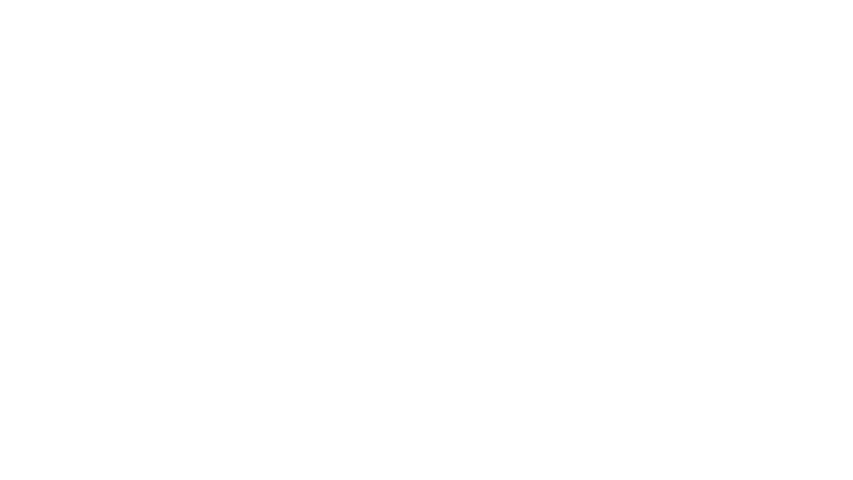

## Start by loading the project repository

In [1]:
import os
path = '/content/SIRLikelihood/'
isFile = os.path.isdir(path) 
if isFile == True:
  !rm -r /content/SIRLikelihood/

!git clone https://github.com/egonspin/SIRLikelihood 

Cloning into 'SIRLikelihood'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 62 (delta 25), reused 44 (delta 13), pack-reused 0
Unpacking objects: 100% (62/62), done.


## Import the necessary libraries
We will be using pytorch for all our ML work, in addition to scipy/numpy/pandas/matplotlib stack

In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
import scipy as sp

import pandas as pd
import copy

import matplotlib as mp
import matplotlib.pyplot as plt
# force inline plots
%matplotlib inline
plt.style.use('seaborn-deep')

# import torch.multiprocessing
# torch.multiprocessing.set_sharing_strategy('file_system')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [19]:
# update fonts
FONTSIZE = 12
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}
mp.rc('font', **font)

# set a seed to ensure reproducibility
seed = 128
rnd  = np.random.RandomState(seed)

BASE = ''

# Explaratory Data Analysis

We have two classes, class with target 0 is the "fake" data, and class with target 1 is the "real" data. Each row represents a simulation of an epidemic, with 13 infected counts $\{ I \}$. Please observe the dataframe blow

In [20]:
import pandas as pd; import numpy as np
df = pd.read_csv(BASE +'CompleteDataframe.csv')#SIRLikelihood/CompleteDataframe.csv
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head(-10)

Infected     alpha      beta  \
0      [  4  12  23  65  99 154 147 166 151  94  83  ...  0.530194  0.001749   
1      [  5  19  56 111 199 240 196 148 101  59  51  ...  0.538565  0.002075   
2      [  2 139 447 387 232 167  92  59  52  11  11  ...  0.488867  0.003501   
3                            [3 0 1 0 0 0 0 0 0 0 0 0 0]  0.877830  0.000049   
4      [  1  79 218 390 368 342 235 186 130  94  61  ...  0.339035  0.002534   
...                                                  ...       ...       ...   
99985  [  3.   5.   5.   8.   9.  13.  18.  31.  42. ...  0.206270  0.000921   
99986           [3. 1. 2. 3. 2. 1. 2. 1. 2. 1. 0. 0. 0.]  0.598765  0.000321   
99987  [  3.  20.  32.  48.  88. 110. 120. 149. 123. ...  0.613023  0.001764   
99988           [3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  0.565252  0.000615   
99989  [ 3. 15. 23. 13. 15. 17. 27. 42. 42. 54. 55. 4...  0.560120  0.001134   

        i0   r0     s0                                      time  Target  
0      3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     0.0  
1      3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     0.0  
2      3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     0.0  
3      3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     0.0  
4      3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     0.0  
...    ...  ...    ...                                       ...     ...  
99985  3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     1.0  
99986  3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     1.0  
99987  3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     1.0  
99988  3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     1.0  
99989  3.0  0.0  763.0  [ 0  2  3  4  5  6  7  8  9 10 11 12 13]     1.0  

[99990 rows x 8 columns]

In [6]:
df.describe()

alpha           beta        i0        r0        s0  \
count  100000.000000  100000.000000  100000.0  100000.0  100000.0   
mean        0.465792       0.002368       3.0       0.0     763.0   
std         0.265182       0.001354       0.0       0.0       0.0   
min         0.004671       0.000024       3.0       0.0     763.0   
25%         0.236143       0.001191       3.0       0.0     763.0   
50%         0.467238       0.002370       3.0       0.0     763.0   
75%         0.694420       0.003543       3.0       0.0     763.0   
max         0.925343       0.004716       3.0       0.0     763.0   

              Target  
count  100000.000000  
mean        0.500000  
std         0.500003  
min         0.000000  
25%         0.000000  
50%         0.500000  
75%         1.000000  
max         1.000000

### Interact with the dataframe with widgets

In [8]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def unique_targets(array):
    #np.unique returns the unique elements in an array 
    unique = array.unique().tolist()
    unique.sort()
    return unique

unique_targets(df.Target)

[0.0, 1.0]

In [10]:
#create a drop down button for choosing the different types of targets
dropdown = widgets.Dropdown(options=unique_targets(df.Target) )

def targets_display(change):
    with out:
        clear_output()
        display(df[df.Target == change.new])

#make a dropdown button that you can change based on targets column
out = widgets.Output()
dropdown.observe(targets_display, names='value')
display(dropdown)
display(out)

Dropdown(options=(0.0, 1.0), value=0.0)

Output()

In [14]:
from ipywidgets import interact
@interact
def interact_with_columns(column=['alpha', 'beta', 'Target'], x = (0,1, 0.001) ):
    return df.loc[df[column] > x]


interactive(children=(Dropdown(description='column', options=('alpha', 'beta', 'Target'), value='alpha'), Floa…

In [4]:
# Let's see how the distribution differs between the two classes

In [ ]:
def plot_data_from_df(df, N=8000, nbins=50):
    
    # divide data into 
    # those with target == 1 and 
    # those with target == 0.
    sig = df[df.Target > 0.5][:N]
    bkg = df[df.Target < 0.5][:N]
    
    # create an empty figure
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,10))
  
    ax1.set_xlabel(r'$\alpha$', fontsize=FONTSIZE)
    ax1.set_xlim((0,1))
    
    ax1.hist(sig.alpha, bins=nbins, range=(0,1),
            color='b', alpha=0.3, label='$t = 1$')
    
    ax1.hist(bkg.alpha, bins=nbins, range=(0,1),
            color='r', alpha=0.3, label='$t = 0$')
    
    ax1.grid(True, which="both", linestyle='-')  
    ax1.legend(loc='upper right')

    #beta
    ax2.set_xlabel(r'$\beta$', fontsize=FONTSIZE)
    ax2.set_xlim((0,0.006))
    
    ax2.hist(sig.beta, bins=nbins, range=(0,0.006),
            color='b', alpha=0.3, label='$t = 1$')
    
    ax2.hist(bkg.beta, bins=nbins, range=(0,0.006),
            color='r', alpha=0.3, label='$t = 0$')
    
    ax2.grid(True, which="both", linestyle='-')  
    ax2.legend(loc='upper right')

    #infected counts
    # ax3.set_xlabel(r'$I$', fontsize=FONTSIZE)
    # ax3.set_xlim((0,300))
    
    # ax3.hist(sig.Infected.values, bins=nbins, range=(0,300),
    #         color='b', alpha=0.3, label='$t = 1$')
    
    # ax3.hist(bkg.Infected.values, bins=nbins, range=(0,300),
    #         color='r', alpha=0.3, label='$t = 0$')
    
    # ax3.grid(True, which="both", linestyle='-')  
    # ax3.legend(loc='upper right')



    plt.show()


In [ ]:
df.Infected[0]

'[  4  12  23  65  99 154 147 166 151  94  83  71  54]'

In [ ]:
# df.Infected[0].lstrip('\'[').rstrip('\']').replace(' ', ',')

In [ ]:
# [df.Infected[i].lstrip("[").lstrip("'").rstrip("]").rstrip("'").replace(' ', ',') for i in range(len(df.Infected))]

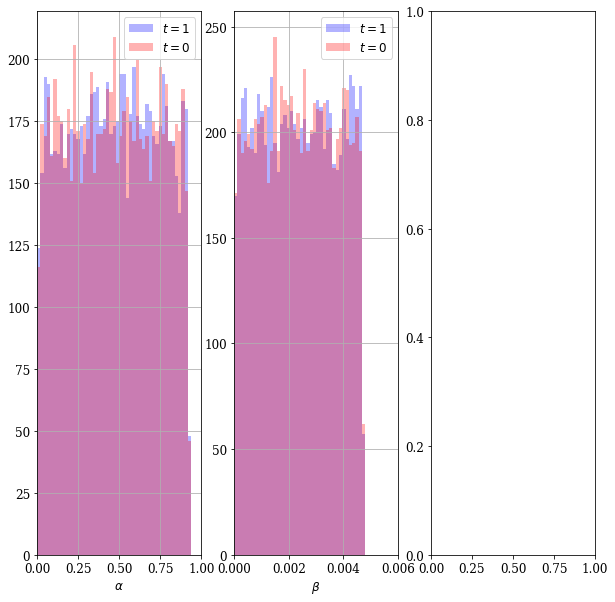

In [ ]:
plot_data_from_df(df)

## Switch to using the data in numpy format, load data.npy

In [21]:
from numpy import load
io = load(BASE + 'data.npy')
io

array([[9.23604299e-01, 4.14983696e-04, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.12132255e-01, 1.98534526e-03, 7.00000000e+00, ...,
        3.15000000e+02, 2.75000000e+02, 0.00000000e+00],
       [5.43568098e-01, 2.41062888e-03, 3.00000000e+00, ...,
        2.70000000e+01, 1.10000000e+01, 1.00000000e+00],
       ...,
       [3.43152531e-01, 2.01679976e-03, 3.00000000e+00, ...,
        7.60000000e+01, 4.60000000e+01, 0.00000000e+00],
       [5.27124067e-01, 2.39336011e-03, 3.00000000e+00, ...,
        1.40000000e+01, 1.40000000e+01, 0.00000000e+00],
       [1.70410480e-01, 1.98850653e-03, 3.00000000e+00, ...,
        2.58000000e+02, 2.14000000e+02, 1.00000000e+00]])

This numpy array is much more conveniet to work with and faster. One can index it through **io[row number, column number]**

For example, we can access the $\alpha$ feature as the first column, and with selectring all the rows with ":",  i.e.

In [ ]:
io[:,0]

array([0.9236043 , 0.11213225, 0.5435681 , ..., 0.34315253, 0.52712407,
       0.17041048])

The last column of the array is the targets column, with 0 for background and 1 for signal

In [ ]:
io[:,-1]

array([1., 0., 1., ..., 0., 0., 1.])

Notice how difficult it seems to discriminate between $\alpha$ and $\beta$ of the two classes, they don't display anything which could help us discriminate between them 

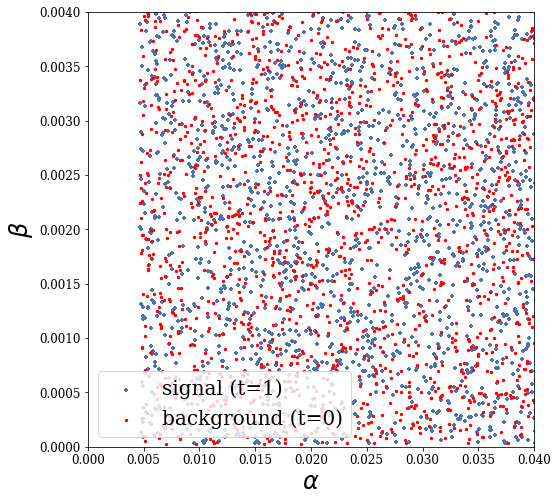

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
#Define signal and background classes
sig = io[io[:, -1] > 0.5]
bkg = io[io[:, -1] < 0.5]

plt.xlabel(r'$\alpha$', fontsize=24)
plt.ylabel(r'$\beta$',fontsize=24)
plt.xlim([0, 0.04])
plt.ylim([0, 0.004])
plt.scatter(sig[:,0], sig[:,1], label='signal (t=1)', s=2, marker="P", linewidths =2)
plt.scatter(bkg[:,0], bkg[:,1], label='background (t=0)', c='r', s=2,  linewidths =2)
plt.legend(fontsize=20, loc='best')

Notice however that infected counts have a slightly more descenable discrimination surface. For example see below we plot the infeced counts on the second and third day

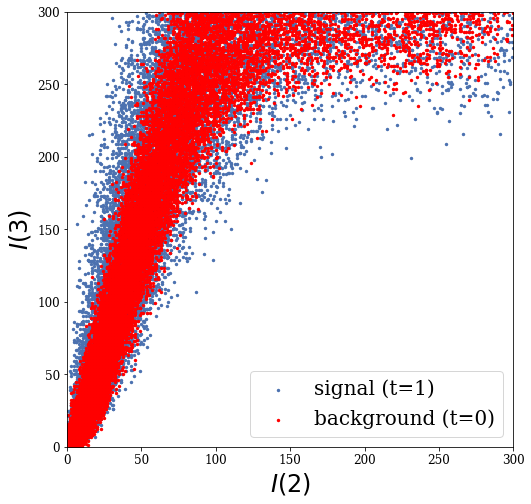

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)

plt.xlim([0, 300])
plt.ylim([0, 300])
plt.xlabel(r'$I(2)$', fontsize=24)
plt.ylabel(r'$I(3)$',fontsize=24)
plt.scatter(sig[:,3], sig[:,4], label='signal (t=1)', s=2, linewidths =2)
plt.scatter(bkg[:,3], bkg[:,4], label='background (t=0)', c='r', s=2, linewidths =2)
plt.legend(fontsize=20, loc='best')

## Discriminate between the two classes
Our ultimate goal is to model the likelihood data and put inferences and error bars on $\alpha$ and $\beta$. In order to simulate the data properly, and later compare the simulated data (which is solved using the ODE solution), to the "real" data, which is found using a stochastic model of the ODE and the actual counts, we must start with the same initial conditions as the real data.


Notice how difficult it seems to discriminate between $\alpha$ and $\beta$ of the two classes 

In [ ]:
sig_data_small = sig[:300, :-1]

Define features, targets, number of samples and features (i.e. the dimensions of our data)

In [22]:
data = io[:, :-1]; #(features are everything but the last column)
targets = io[:,-1]; #Targets is the last column
n_samples, n_features = data.shape #it might be the case that this works even if X has time series column
n_samples, n_features #only infected array, alpha and beta

(100000, 15)

## Train Test Split
stratifying on the targets ensures a balanced proportion of the classes in the train and test sets

In [ ]:
ntargets = 1
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, 
                                                                      targets, 
                                                                      stratify=targets)
#Reshape the targets to have shape (something, 1)
train_targets = train_targets.reshape(-1,1)
test_targets = test_targets.reshape(-1,1)
test_targets

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

## Check the mean and standard deviation of the training data

In [ ]:
train_data.mean(), train_data.std()

(115.91014651216084, 171.07275267088173)

In [ ]:
# from numpy import load
# io = load('data.npy')
# io

In [23]:
data = io[:, :-1]; #(features are everything but the last column)
targets = io[:,-1]; #Targets is the last column
n_samples, n_features = data.shape#it might be the case that this works even if X has time series column
n_samples, n_features #only infected array, alpha and beta

(100000, 15)

You can also use the data in pandas dataframe format (in Only run this if you want dataframe)

In [ ]:
import pandas as pd; import numpy as np
df = pd.read_csv(BASE+'CompleteDataframe.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head(-10)

In [ ]:
df.Infected[0]

'[  4  12  23  65  99 154 147 166 151  94  83  71  54]'

## Check the mean and standard deviation of the training data

In [ ]:
train_data.mean(), train_data.std()

(115.91014651216084, 171.07275267088173)

## Standardize features by removing the mean (mean=0) and scaling to unit variance, this helps the training of our ML model by  tremendous amount

In [ ]:
sc = StandardScaler()#this is always recommended for logistic regression
train_data= sc.fit_transform(train_data)
test_data = sc.transform(test_data)

## check again to make sure mean=0, std=1

In [ ]:
train_data.mean(), (train_data.std())**2

(-8.012395685202339e-16, 0.9999999999999276)

## Create Custom Dataset for our data
This takes the index for the data and target and gives dictionary of tensors of data and targets



In [24]:
class CustomDataset:
    def __init__(self, data, targets):
        self.data = data
        self.targets=targets
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        
        current_sample = self.data[idx, :]
        current_target = self.targets[idx]
        return {"x": torch.tensor(current_sample, dtype = torch.float),
               "y": torch.tensor(current_target, dtype= torch.float),
               }#this already makes the targets made of one tensor (of one value) each

## Create train and test custom datasets - which are made from the train and test datasets, respectively

In [8]:
train_dataset = CustomDataset(train_data, train_targets)
test_dataset = CustomDataset(test_data, test_targets)

## These custom datasets return a dictionary of samples "x" of length 15, and targets "y" of length 1 (either y=1 or y=0)

In [ ]:
train_dataset[0]

{'x': tensor([1.4333e-01, 3.2845e-03, 3.0000e+00, 2.1700e+02, 5.3900e+02, 5.8100e+02,
         5.1700e+02, 4.5800e+02, 3.8900e+02, 3.3100e+02, 2.9500e+02, 2.4300e+02,
         2.1000e+02, 1.8000e+02, 1.5800e+02]), 'y': tensor([1.])}

In [ ]:
train_targets.shape

(75000, 1)

## Create Train and Test DataLoaders
we now need the train data loader and the test data loader, choose the number of batch size, number of workers (cpu cores). Pass shuffle=True for the train_loader to get shuffled training data, do not shuffle the 

In [ ]:

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=10, 
                                           num_workers=2, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=10, num_workers=2)

In [ ]:
train_loader

## Create an Engine Class. This takes the model and optimizer, and has functions that perform the training and evaluation on the dataloaders.

In [25]:

class Engine:
    """loss, training and evaluation"""
    def __init__(self, model, optimizer):
                 #, device):
        self.model = model
        #self.device= device
        self.optimizer = optimizer
        
    #the loss function returns the loss function. It is a static method so it doesn't need self
    @staticmethod
    def loss_fun(targets, outputs):
         return nn.BCEWithLogitsLoss()(outputs, targets)
#     This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, 
#     by combining the operations into one layer

    def train(self, data_loader):
        """the training function: takes the training dataloader"""
        self.model.train()
        final_loss = 0
        for data in data_loader:
            self.optimizer.zero_grad()
            inputs = data["x"]#.to(self.device)
            targets = data["y"]#.to(self.device)
            outputs = self.model(inputs)
            loss = self.loss_fun(targets, outputs)
            loss.backward()
            self.optimizer.step()
            final_loss += loss.item()
            return final_loss / len(data_loader)

    
    def evaluate(self, data_loader):
        """the training function: takes the training dataloader"""
        self.model.eval()
        final_loss = 0
        for data in data_loader:
            inputs = data["x"]#.to(self.device)
            targets = data["y"]#.to(self.device)
            outputs = self.model(inputs)
            loss = self.loss_fun(targets, outputs)
            final_loss += loss.item()
            return outputs
            #return final_loss / len(data_loader)
    
    
    ##HYPERPARAMETER TUNING WITH OPTUNA

# Create our model class

 This is where you explore your desired ML model architechture. This (below) is a fully connected neural deep network (MLP) with batch normalization, dropout and ReLU activation after each layer, and a linear layer at the end followed by a sigmoid to map it onto the range $[0,1]$

In [26]:
#explore different loss functions: whether it's better to use a loss function model output : 1. a/(a+b), 2. a/b, where a and ba re two classes


class Model(nn.Module):
    def __init__(self, nfeatures, ntargets, nlayers, hidden_size, dropout):
        super().__init__()
        layers = []
        for _ in range(nlayers):
            if len(layers) ==0:
                #inital layer has to have size of input features as its input layer
                #its output layer can have any size but it must match the size of the input layer of the next linear layer
                #here we choose its output layer as the hidden size (fully connected)
                layers.append(nn.Linear(nfeatures, hidden_size))
                #batch normalization
                layers.append(nn.BatchNorm1d(hidden_size))
                layers.append(nn.Dropout(dropout))
                #ReLU activation 
                layers.append(nn.ReLU())
            else:
                #if this is not the first layer (we dont have layers)
                layers.append(nn.Linear(hidden_size, hidden_size))
                layers.append(nn.BatchNorm1d(hidden_size))
                layers.append(nn.Dropout(dropout))
                layers.append(nn.ReLU())
                #output layer:
        layers.append(nn.Linear(hidden_size, ntargets)) 
        
        layers.append(nn.Sigmoid())
            #we have defined sequential model using the layers in oulist 
        self.model = nn.Sequential(*layers)
            
    
    def forward(self, x):
        return self.model(x)
    
    def forward_with_sigmoid(self, x):
        return self.sigmoid(self.forward(x))

## Hyperparameter Tuning and Exploring (other) Different Model Architectures Here (Below). 
If you follow the same recipe as the "Model" class, other models like CNN's are fully compatible here.

In [28]:
# nfeatures = xtrain.shape[1],
# ntargets = ytrain.shape[1],
# nlayers = 2
# hidden_size=128,
# dropout=0.3
xtrain = train_data;  xtest = test_data
ytrain = train_targets;  ytest = test_targets
ytrain.shape

## Define your model, the number of features (here 15), number of targets=1, and choose the number of layers, hidden layers size and dropout

In [ ]:
# #ytrain.view()
# ytrain= ytrain.reshape(-1,1)
#drop dropout after evaluating
# ytrain.shape
model =  Model(nfeatures=xtrain.shape[1], 
               ntargets=1,
               nlayers=5, 
               hidden_size=128, 
               dropout=0.3)
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.3, inplace=False)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Dropout(p=0.3, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=128, bias=True)
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Dropout(p=0.3, inplace=False)
    (15): ReLU()
    (16): Linear(in_features=128, out_features=128, bias=True)
    (17): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_run

Choose Adam optimizer, define your Engine instance using the above model and optimizer. Start with a very high initial loss (infinity) and define an early stopping iterator (and counter) which stops the trainig after a specified number of steps if the loss is not decreasing. Define the number of epochs (note that the model will be trained on the entirety of the data in each epoch)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

eng = Engine(model=model, optimizer = optimizer)
best_loss = np.inf
early_stopping_iter = 10
early_stopping_counter = 0
EPOCHS=22

## Training loop
Iterate only over the epochs, since the iteration of the data over the data loaders was already done in the engine class.

In [ ]:
for epoch in range(EPOCHS):
    train_loss = eng.train(train_loader)
    test_loss = eng.train(test_loader)
    print("Epoch : %-10g, Training Loss: %-10g, Test Loss: %-10g" % (epoch, train_loss, test_loss))
    #print(f"{epoch}, {train_loss}, {test_loss}")
    if test_loss < best_loss:
        best_loss = test_loss
        
    else:
        early_stopping_counter += 1
    
    if early_stopping_counter > early_stopping_iter:
        #if we are not improving for 10 iterations then break the loop
        #we could save best model here
        break

Epoch : 0         , Training Loss: 0.000109501, Test Loss: 0.000277355
Epoch : 1         , Training Loss: 7.90709e-05, Test Loss: 0.000295437
Epoch : 2         , Training Loss: 9.65471e-05, Test Loss: 0.000281629
Epoch : 3         , Training Loss: 7.80975e-05, Test Loss: 0.000281522
Epoch : 4         , Training Loss: 0.000100012, Test Loss: 0.000290491
Epoch : 5         , Training Loss: 8.35759e-05, Test Loss: 0.000283051
Epoch : 6         , Training Loss: 8.90379e-05, Test Loss: 0.000286951
Epoch : 7         , Training Loss: 0.000103693, Test Loss: 0.000288421
Epoch : 8         , Training Loss: 0.000105689, Test Loss: 0.000281015
Epoch : 9         , Training Loss: 8.78452e-05, Test Loss: 0.000280412
Epoch : 10        , Training Loss: 8.77613e-05, Test Loss: 0.000271323
Epoch : 11        , Training Loss: 9.60797e-05, Test Loss: 0.0002662 
Epoch : 12        , Training Loss: 0.000109893, Test Loss: 0.000274091
Epoch : 13        , Training Loss: 9.8922e-05, Test Loss: 0.000274951


## Evaluate the model and predict the targets 

In [ ]:
outputs = []
labels = []
accuracies = []

#evaluate
with torch.no_grad():
    for data in test_loader:
        data_cp = copy.deepcopy(data)
        
        xtest = data_cp["x"]
        ytest = data_cp["y"]
        output = model(xtest)
        labels.append(ytest)
        outputs.append(output)
        
        y_predicted_cls = output.round()
        acc = y_predicted_cls.eq(ytest).sum() / float(ytest.shape[0])#bumber of correct predictions/sizeofytest
        #accuracies.append(acc.numpy())
        #print(f'accuracy: {acc.item():.4f}')
        
        del data_cp

#     acc = y_predicted_cls.eq(ytest).sum() / float(ytest.shape[0])
#     print(f'accuracy: {acc.item():.4f}')

Examine the outputs. We see the outputs (and labels) are tensors in batches of 10 instances

In [ ]:
outputs[0:2]

[tensor([[0.4178],
         [0.4348],
         [0.3140],
         [0.2843],
         [0.3711],
         [0.7044],
         [0.1822],
         [0.4088],
         [0.3719],
         [0.3666]]), tensor([[0.2874],
         [0.4445],
         [0.6355],
         [0.2456],
         [0.2799],
         [0.1910],
         [0.4665],
         [0.3570],
         [0.3846],
         [0.4334]])]

Concatenate everything in the batch structure of the outputs and labels

In [ ]:
OUTPUTS = torch.cat(outputs).view(-1).numpy()

LABELS = torch.cat(labels).view(-1).numpy()
OUTPUTS, LABELS

(array([0.41776702, 0.43478125, 0.31395075, ..., 0.20787324, 0.5145598 ,
        0.3174073 ], dtype=float32),
 array([0., 0., 0., ..., 0., 1., 0.], dtype=float32))

## Examine the distributions of the predicted class labels and the true class labels

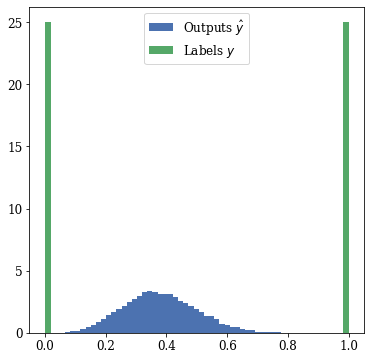

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(OUTPUTS, bins=50, density=True, label = "Outputs $\hat{y}$")
plt.hist(LABELS, bins=50,density=True, label = "Labels $y$")
plt.legend()
plt.show()

In [11]:

def plot_distributions(p, t):
    ps = p[t > 0.5] 
    pb = p[t < 0.5] 
    
    # create an empty figure
    fig = plt.figure(figsize=(5, 5))
    fig.tight_layout()
    
    # add a subplot to it
    nrows, ncols, index = 1,1,1
    ax  = fig.add_subplot(nrows,ncols,index)
    ax.set_xlim(0, 1)

    ax.hist(ps, bins=50, color='b',
            histtype='stepfilled',
            alpha=0.3, label='$t = 1$')
    
    ax.hist(pb, bins=50, color='r',
            histtype='stepfilled',
            alpha=0.3, label='$t = 0$')
    
    ax.set_xlabel('$p(1|x)$', fontsize=FONTSIZE)
    ax.legend(loc='upper right')

    plt.show()

## Compute the probability distribution of the model's predicted class labels

In [65]:
def compute_prob(model, xx):
    # convert from numpy array to a torch tensor of type float
    x = torch.from_numpy(xx).float()#.to(device)

    # compute p(1|x)
    model.eval() # evaluation mode
    p = model(x)#.to(device)

    # squeeze() removes extraneous dimensions
    p = p.squeeze()

    # detach().numpy() converts back to a numpy array
    p = p.detach().cpu().numpy()
    return p

In [ ]:
p = compute_prob(model, test_data)
p

array([0.35252872, 0.4573793 , 0.34747285, ..., 0.32639423, 0.57184637,
       0.3492819 ], dtype=float32)

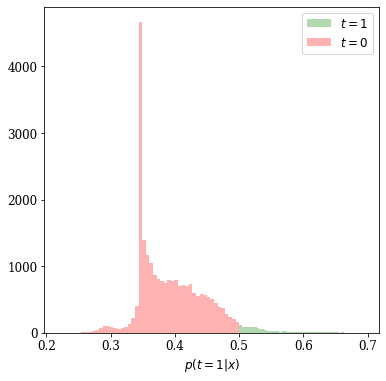

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(p[p>0.5], bins=50, color='g',
            histtype='stepfilled',
            alpha=0.3,label = '$t = 1$')
plt.hist(p[p<0.5], bins=50, color='r',
            histtype='stepfilled',
            alpha=0.3,label = '$t = 0$')
plt.xlabel('$p(t=1|x)$', fontsize=FONTSIZE)
plt.legend()

##Save Trained Model

In [ ]:
FILE = "/content/SIRLikelihood/model.pth"
torch.save(model, FILE)

## Load Trained Model (could be from another notebook)
This model will then be reinstatiated and used in another part of our code in another notebook (as the worflow diagram shows).

In [ ]:
model = torch.load(FILE) #we have to set it to evaluation method
model.eval()

Model(
  (model): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.3, inplace=False)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=128, bias=True)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Dropout(p=0.3, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=128, out_features=128, bias=True)
    (13): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Dropout(p=0.3, inplace=False)
    (15): ReLU()
    (16): Linear(in_features=128, out_features=128, bias=True)
    (17): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_run

Examine the parameters of our loaded trained model

In [ ]:
#now we can use our trained model
print([i for i in model.parameters()][0])

Parameter containing:
tensor([[ 0.0714, -0.1759, -0.2475,  ...,  0.1263, -0.1182,  0.1955],
        [-0.2101, -0.2474, -0.0901,  ..., -0.0386, -0.2582, -0.0505],
        [ 0.0596,  0.1198, -0.1687,  ...,  0.1180,  0.0790, -0.1216],
        ...,
        [ 0.1873, -0.1674,  0.1054,  ..., -0.0415,  0.1800, -0.1096],
        [-0.1718,  0.1919, -0.2528,  ..., -0.0171, -0.2275, -0.1847],
        [-0.1960, -0.1537, -0.0804,  ...,  0.1150, -0.1693,  0.1049]],
       requires_grad=True)


##Now this model can be reconstituted outside this noteboook, and passed to a constructor which uses it.

This is an example of the class outside this notebook which reconstructs and uses this (or any) model. This class takes the model, and it multiplies the product of Poissons where for each Poisson the mean count $I$ is solved from the ODE IVP.

## Evaluate Trained Model and predict labels

In [ ]:
outputs = []
labels = []
accuracies = []

#evaluate
with torch.no_grad():
    for data in test_loader:
        data_cp = copy.deepcopy(data)
        
        xtest = data_cp["x"]
        ytest = data_cp["y"]
        output = model(xtest)
        labels.append(ytest)
        outputs.append(output)
        
        y_predicted_cls = output.round()
        acc = y_predicted_cls.eq(ytest).sum() / float(ytest.shape[0])#bumber of correct predictions/sizeofytest
        #accuracies.append(acc.numpy())
        #print(f'accuracy: {acc.item():.4f}')
        
        del data_cp

#     acc = y_predicted_cls.eq(ytest).sum() / float(ytest.shape[0])
#     print(f'accuracy: {acc.item():.4f}')

In [ ]:
outputs[0:2]

[tensor([[0.1698],
         [0.7209],
         [0.7327],
         [0.2662],
         [0.1496],
         [0.8487],
         [0.1289],
         [0.5662],
         [0.1054],
         [0.0536]]), tensor([[0.1978],
         [0.6494],
         [0.3195],
         [0.4527],
         [0.3549],
         [0.1415],
         [0.4923],
         [0.2129],
         [0.3908],
         [0.5285]])]

In [ ]:
OUTPUTS = torch.cat(outputs).view(-1).numpy()#concatenate everything

LABELS = torch.cat(labels).view(-1).numpy()
OUTPUTS, LABELS

(array([0.16982348, 0.7208782 , 0.73274773, ..., 0.16515236, 0.424555  ,
        0.13074984], dtype=float32),
 array([0., 1., 1., ..., 1., 1., 0.], dtype=float32))

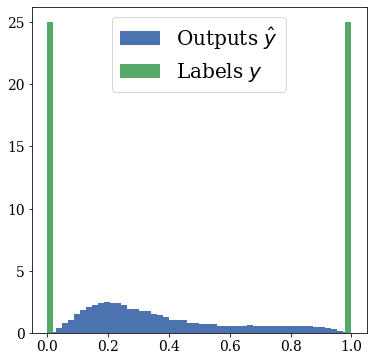

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(OUTPUTS, bins=50, density=True, label = "Outputs $\hat{y}$")
plt.hist(LABELS, bins=50,density=True, label = "Labels $y$")
plt.legend()
plt.show()



---



---


# Sanity Check

## Checking Method and Model Performance with a Gaussian Process Case Study 

We can check how this method performs by generating toy data from a multivariateGaussian distributions, and go throught the chain of the whole procedure to validate this method.

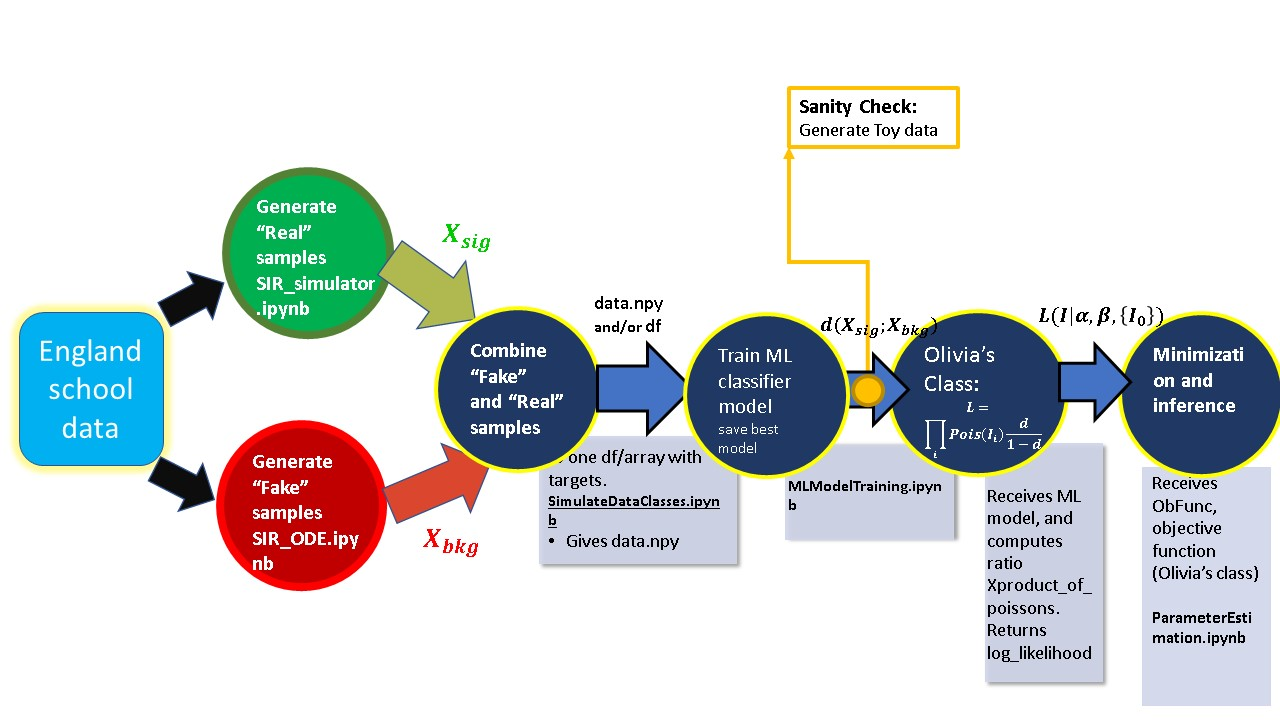

Suppose that we have a data set of observations $\mathbf{x}=\left(x_{1}, \ldots, x_{N}\right)^{\mathrm{T}}$, representing N observations of the scalar variable x.  Also, suppose that the observations are
drawn independently from a Gaussian distribution whose mean µ and variance σ2
are unknown, and we would like to determine these parameters from the data set. Since our data set $\mathbf{x}$ is iid, then the probability of the data set, given $\mu$ and $\sigma^2$ is 
$$p\left(\mathbf{x} \mid \mu, \sigma^{2}\right)=\prod_{n=1}^{N} \mathcal{N}\left(x_{n} \mid \mu, \sigma^{2}\right)$$

Hence  the Gaussian distribution defined over a D-dimensional vector x of continuous variables is called the multivariate Gaussian, and is given by

$$\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}, \mathbf{\Sigma})=\frac{1}{(2 \pi)^{D / 2}} \frac{1}{|\mathbf{\Sigma}|^{1 / 2}} \exp \left\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\mathrm{T}} \mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right\}$$
where the D-dimensional vector µ is called the mean, the D × D matrix Σ is called
the covariance, and |Σ| denotes the determinant of Σ.

if two sets of variables are jointly Gaussian, then the conditional distribution of one set
conditioned on the other is again Gaussian.

Suppose $\mathbf{x}$ is a D-dimensional
vector with Gaussian distribution $\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}, \mathbf{\Sigma})$  and that we partition $\mathbf{x}$ into two disjoint subsets $\mathbf{x_a}$ and $\mathbf{x_b}$. Without loss of generality, we can take $\mathbf{x_a}$ to form the first M components of $\mathbf{x}$, with $\mathbf{x_b}$ comprising the remaining $(D − M)$ components, so that
$$\mathbf{x}=\left(\begin{array}{l}
\mathbf{x}_{a} \\
\mathbf{x}_{b}
\end{array}\right)$$
We also define corresponding partitions of the mean vector $\mathbf{\mu}$ given by
$$\boldsymbol{\mu}=\left(\begin{array}{l}
\boldsymbol{\mu}_{a} \\
\boldsymbol{\mu}_{b}
\end{array}\right)$$

and of the covariance matrix $\mathbf{\Sigma}$ given by
$$\Sigma=\left(\begin{array}{ll}
\Sigma_{a a} & \Sigma_{a b} \\
\Sigma_{b a} & \Sigma_{b b}
\end{array}\right)$$


If you would like to get a more intuitive idea of the multivariate gaussian, review the code and interactive 3d plot below. This produces a bivariate gaussian, where we have two features $x$ and $y$. Play with their means and variances and see how it affects the distribution (also remember that every slice on this plane is an equally probably plane)

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def bivar_norm_dist(mean_x, mean_y, var_x, var_y):
    
    x = np.linspace(-4, 4, 1000)
    y = np.linspace(-4, 4, 1000)    
    
    fig  = plt.figure()
    ax   = fig.gca(projection='3d')
    x, y = np.meshgrid(x, y)
    
    z = (np.e**(-(x-mean_x)**2/(2*var_x)-(y-mean_y)**2/(2*var_y)))/(var_x*var_y*2*np.pi)**0.5
    
    surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False)
    ax.contour(x, y, z, cmap=cm.viridis, linewidth=0.2,linestyles="solid", offset=-0.1)
    ax.contourf(x, y, z, cmap=cm.viridis, offset=-0.1)
    ax.set_zlim(-0.1, 0.1)
    
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [14]:
interact(bivar_norm_dist, mean_x=(-10,10,1), mean_y=(-10,10,1), var_x=(2,5,1), var_y=(2,5,1))

interactive(children=(IntSlider(value=0, description='mean_x', max=10, min=-10), IntSlider(value=0, descriptio…

<function __main__.bivar_norm_dist>

In applying the above explanation and intuition to our problem, we shal now model the data as a multivariate gaussian ,where our features are $x=\{ I_1,...,I_{13} \}$ (just the counts) and hence our covariance matrix will be $13 \times 13$. The signal will be have correlated counts (and hence nonzero off diagonal elements in the covariance matrix) and the background will be uncorrelated (and hence zero off diagonal elements in its covariance matrix).

# Generating the Toy Data 

### Recall the England school data

This was one vector of times and one vector of infected counts, each of size 13. Specifically, they are given in the cell below

(array([5., 0., 2., 0., 1., 0., 1., 2., 1., 1.]),
 array([  3. ,  32.3,  61.6,  90.9, 120.2, 149.5, 178.8, 208.1, 237.4,
        266.7, 296. ]),
 [<matplotlib.patches.Polygon at 0x7f6936a63f50>])

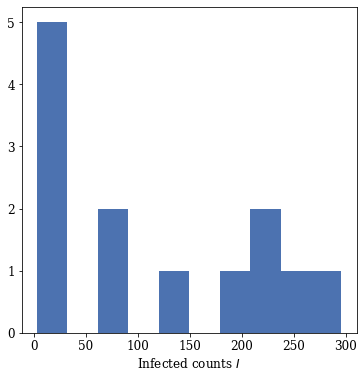

In [79]:
import numpy as np
alpha = 0.465 
beta = 0.00237 
tdata0 = np.array([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]) -1 
ydata0 = np.array([3, 25, 75, 227, 296, 258, 236, 192, 126, 71, 28, 11, 7])

alphaRange = [alpha*0.01,alpha*1.99]
betaRange = [beta*0.01,beta*1.99]
s0mean = 763; #763 - boarding school value
i0mean = 3;
r0mean = 0;
init_mean = np.array([s0mean,i0mean,r0mean])

plt.xlabel('Infected counts $I$')
plt.hist(ydata0, histtype='stepfilled')

This is all the (real world) data that we have. We built a model to model this data as the signal samples using the stochastic method. This shall be our signal ("real") class samples. 


$\textbf{Signal:}$

We generate the data such that the signal, i.e. real counts comes from a multivariate Gaussian where the mean of the counts comes from height of the real data (of the infected counts from England) if it were modeled as a Gaussian. The correlation matrix can be invented (ideally it comes from the signal data), such that we have correlated (dependent) features
$$\Sigma_{signal}=\left(\begin{array}{ll}
\Sigma_{a a}^{\text{Stochastic}} & \Sigma_{a b}^{\text{Stochastic}} \\
\Sigma_{b a}^{\text{Stochastic}} & \Sigma_{b b}^{\text{Stochastic}}
\end{array}\right)$$


$\textbf{Background:}$

We generate the background ("fake data") from a multigaussian where the mean of the counts comes from solving the differential equation. In contrast to the signal, the background has no correlation (independent)
$$ \Sigma_{background}=\left(\begin{array}{ll}
\Sigma_{a a}^{\text{ODE}} & 0 \\
0 & \Sigma_{b b}^{\text{ODE}}
\end{array}\right)$$
Similarly, the mean vector for each class was generated in a similar fashion.



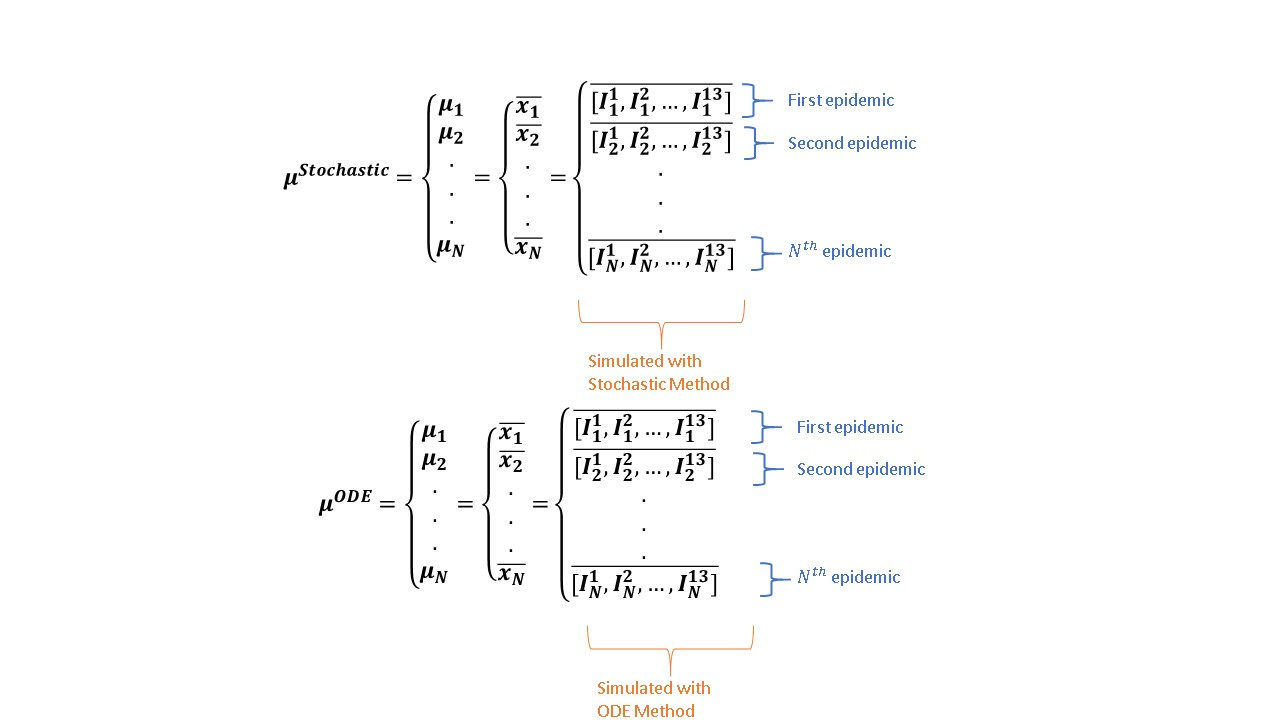

In building the Multivariate Gaussian (toy data) that is roughly like the data that we have, we thus follow the following steps:


1. Generate Signal Multivariate Gaussian (toy data)
2. Generate Background Multivariate Gaussian (toy data)
3. Go through ML procedure
4. Approximate the likelihood of the Signal toy data.
5. Compapre the likelihood (in step 4) to the MVN toy signal data, to evaluate how well the likelihood is approximated.
$

What if we have negative counts? For the time being we don't worry about that (we accept negative counts for now.)

In [80]:
sig = io[io[:, -1] > 0.5]
bkg = io[io[:, -1] < 0.5]

#Take only infected counts as our feature vectors
sig_data=sig[:,2:-1]; sig_data
bkg_data=bkg[:,2:-1]; bkg_data


array([[  7.,  46., 166., ..., 301., 315., 275.],
       [  2., 185., 339., ...,   2.,   1.,   3.],
       [  3., 100., 249., ...,   1.,   2.,   0.],
       ...,
       [  3.,   6.,   5., ...,   6.,   3.,   5.],
       [  3.,  24.,  98., ..., 103.,  76.,  46.],
       [  3.,  42., 116., ...,  32.,  14.,  14.]])

In [81]:
sig_data.shape

(50000, 13)

so we have our features vector has 13 columns

Get the mean vectors $\mathbf{\mu}$ for signal and background. (this is the sample mean across each column -> Gives use a mean vector of size 13. 

In [82]:
def mean_vector(X):
  m, n = X.shape
  mean = X.mean(axis=0)
  return mean
mean_vec_sig = mean_vector(sig_data); mean_vec_sig

array([  3.     , 101.05642, 189.10672, 211.10698, 200.90628, 181.44848,
       161.2264 , 142.95294, 127.19228, 113.82852, 102.53698,  92.94048,
        84.7145 ])

In [83]:
mean_vec_sig.shape

(13,)

Now do it for the background

In [84]:
mean_vec_bkg = mean_vector(bkg_data); mean_vec_bkg

array([  3.01264, 111.27406, 202.04388, 219.80986, 206.88184, 186.06804,
       164.7658 , 145.83624, 129.51386, 115.81194, 104.2831 ,  94.39912,
        86.07606])

In [85]:
mean_vec_bkg.shape

(13,)

Calculate the covariance matrix $\Sigma$ for signal and background. (We get $\Sigma^{Signal}$ from the signal features vector $X_{Sig}$, and we add noise to it.

In [86]:
def covariance_matrix(X):
    m, n = X.shape 
    mean = X.mean(axis=0)
    cov_matrix = (X - mean).T.dot((X - mean)) / m-1
    np.random.seed(2020)
    return cov_matrix + 0.00001 * np.random.rand(n,n)

#The covariance matrix for our signal toy data comes from the signal data
cov_mat_sig = np.array(covariance_matrix(sig_data))

In [87]:
cov_mat_sig

array([[-9.99990137e-01, -9.99991266e-01, -9.99994903e-01,
        -9.99997282e-01, -9.99996631e-01, -9.99997830e-01,
        -9.99997235e-01, -9.99996567e-01, -9.99991378e-01,
        -9.99998433e-01, -9.99998591e-01, -9.99992429e-01,
        -9.99992637e-01],
       [-9.99996443e-01,  1.91677949e+04,  2.55047723e+04,
         1.99724598e+04,  1.44282826e+04,  1.06477891e+04,
         8.19822853e+03,  6.58448444e+03,  5.48988517e+03,
         4.72001742e+03,  4.15370421e+03,  3.72209876e+03,
         3.37813107e+03],
       [-9.99999658e-01,  2.55047723e+04,  4.27610675e+04,
         3.89372866e+04,  3.04423179e+04,  2.34201320e+04,
         1.84389355e+04,  1.49792461e+04,  1.25567393e+04,
         1.08058280e+04,  9.50090930e+03,  8.49524206e+03,
         7.69590813e+03],
       [-9.99991508e-01,  1.99724598e+04,  3.89372866e+04,
         4.25528666e+04,  3.79502213e+04,  3.18161896e+04,
         2.64780134e+04,  2.23035647e+04,  1.91342591e+04,
         1.67040723e+04,  1.48177563e

In [88]:
cov_mat_sig.shape, cov_mat_sig[0]

((13, 13),
 array([-0.99999014, -0.99999127, -0.9999949 , -0.99999728, -0.99999663,
        -0.99999783, -0.99999724, -0.99999657, -0.99999138, -0.99999843,
        -0.99999859, -0.99999243, -0.99999264]))

So the shape of $\Sigma^{Sig}$ is $13 \times 13$.

Now let's do the covariance matrix for the backround. Below is the full covariance matrix using $X^{Bkg}$

In [89]:
cov_mat_bkg_full = np.array(covariance_matrix(bkg_data)); cov_mat_bkg_full

array([[ 2.00437009e+00, -6.48635384e-01, -1.08854955e+00,
        -8.98833912e-01, -1.97563088e-01,  1.76422144e-01,
         1.71830528e-02, -3.64926640e-01, -5.95986569e-01,
        -8.09141355e-01, -9.15736975e-01, -9.01097306e-01,
        -8.68434035e-01],
       [-6.48640562e-01,  2.01378892e+04,  2.71504040e+04,
         2.12978117e+04,  1.54127277e+04,  1.14248817e+04,
         8.81560941e+03,  7.12999289e+03,  5.99707813e+03,
         5.20740843e+03,  4.61001230e+03,  4.17153542e+03,
         3.81755242e+03],
       [-1.08855430e+00,  2.71504040e+04,  4.37944390e+04,
         3.90910655e+04,  3.05528538e+04,  2.35867061e+04,
         1.85844247e+04,  1.51737711e+04,  1.27782530e+04,
         1.10458333e+04,  9.74693800e+03,  8.77332425e+03,
         7.98837924e+03],
       [-8.98828138e-01,  2.12978117e+04,  3.90910655e+04,
         4.18149186e+04,  3.71800282e+04,  3.14668390e+04,
         2.63879553e+04,  2.24211715e+04,  1.93533392e+04,
         1.69855757e+04,  1.51372962e

But for the background we want zero off-diagonals (for it to be uncorrelated). Find the diagonal of this matrix (which are the standard deviations of each feature) 

In [90]:
cov_mat_bkg_full_diag = cov_mat_bkg_full.diagonal()
cov_mat_bkg_full_diag

array([2.00437009e+00, 2.01378892e+04, 4.37944390e+04, 4.18149186e+04,
       3.77227224e+04, 3.48421739e+04, 3.25015448e+04, 3.04596560e+04,
       2.84867729e+04, 2.66548480e+04, 2.49813805e+04, 2.33604480e+04,
       2.18519142e+04])

Construct $13 \times 13$ matrix filled with zeros

In [91]:
cov_mat_bkg = np.zeros((13,13)); cov_mat_bkg

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Fill this zeros matrix with the main diagonal from  $\Sigma^{Bkg}$

In [92]:
diag_list = cov_mat_bkg_full_diag.tolist()
np.fill_diagonal(cov_mat_bkg, diag_list); cov_mat_bkg

array([[2.00437009e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.01378892e+04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.37944390e+04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.18149186e+04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+

Make a function that extracts the samples from a multivariate Gaussian, given a $\Sigma$ matrix and a $\mu$ vector

$|\Sigma|=d\times d=13 \times 13$,  $|X|=|\mu| = n \times d$ are the dimensions, so that $(x-\mu) \Sigma (x-\mu)^T$ works

In [93]:
d=13 #this has to be 13 since
n=100000 #number of samples, could be anything

def get_mvn_samples(mu,cov,n,d):
    samples = np.zeros((n,d))
    for i in range(n):      
        samples[i,:] = np.random.multivariate_normal(mu, cov, 1)
    
    return samples


In [94]:
sig_mvn = get_mvn_samples(mu=mean_vec_sig, cov=cov_mat_sig, n=100000, d=13); sig_mvn

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


array([[   2.58541769,  189.96852773,  440.30627436, ...,   19.28677133,
           9.17624971,   -8.43601026],
       [   2.30957411,  187.6140112 ,  354.26275339, ...,  192.00862938,
         175.1212581 ,  162.80296648],
       [   2.05384803,  212.30907465,  383.31879553, ...,  121.98575052,
          96.7601958 ,   86.74958772],
       ...,
       [   3.13052887,  -86.84746471,   62.10153337, ...,  211.61138435,
         223.62677136,  222.62687512],
       [   3.64079134,  -41.44532672,   26.54254144, ...,  138.86013271,
         136.44940277,  154.887318  ],
       [   2.8305286 ,  205.65705293,  179.18111177, ..., -148.11115764,
        -171.19485141, -193.99955162]])

In [95]:
bkg_mvn = get_mvn_samples(mu=mean_vec_bkg, cov=cov_mat_bkg, n=100000, d=13)

If we just flatten everything as to view it as just a distribution over the infected counts $I$ (over many epidemics), then we get a distribution that looks like

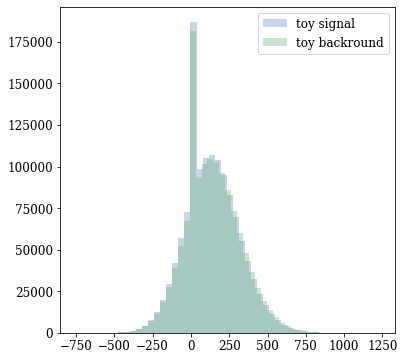

In [96]:
plt.hist(sig_mvn.ravel(), bins=50, alpha=0.3, label='toy signal')
plt.hist(bkg_mvn.ravel(), bins=50, alpha=0.3, label='toy backround')
plt.legend()
plt.show()

## Create a targets column for each of the signal and background toy samples

In [97]:
sig_mvn.shape

(100000, 13)

In [98]:
sig_mvn = np.hstack((sig_mvn,np.ones((sig_mvn.shape[0],1))))
sig_mvn[:,-1]

array([1., 1., 1., ..., 1., 1., 1.])

In [99]:
bkg_mvn = np.hstack((bkg_mvn,np.zeros((bkg_mvn.shape[0],1))))
bkg_mvn[:,-1]

array([0., 0., 0., ..., 0., 0., 0.])

Create the features array for both signal and background by adding the signal and background features row-wise

In [100]:
X_toy = np.vstack((sig_mvn, bkg_mvn))
X_toy

array([[   2.58541769,  189.96852773,  440.30627436, ...,    9.17624971,
          -8.43601026,    1.        ],
       [   2.30957411,  187.6140112 ,  354.26275339, ...,  175.1212581 ,
         162.80296648,    1.        ],
       [   2.05384803,  212.30907465,  383.31879553, ...,   96.7601958 ,
          86.74958772,    1.        ],
       ...,
       [   2.62317389,   18.57492576,  283.39252164, ...,  203.60589388,
         320.84951437,    0.        ],
       [   3.46286304,  384.43953767,  162.7429307 , ...,   -3.3731716 ,
         163.34580289,    0.        ],
       [   3.83665444,   40.8296136 , -138.34846224, ...,  115.74382413,
          -2.7254594 ,    0.        ]])

Define the targets column for the toy data


In [101]:
y_toy = X_toy[:,-1]
y_toy

array([1., 1., 1., ..., 0., 0., 0.])

In [102]:
X_toy[:,-1] #check the last column

array([1., 1., 1., ..., 0., 0., 0.])

In [103]:
X_toy = X_toy[:, :-1]

Check that the last column is a features column and not targets

In [104]:
X_toy[:,-1]

array([ -8.43601026, 162.80296648,  86.74958772, ..., 320.84951437,
       163.34580289,  -2.7254594 ])

In [105]:
n_samples, n_features = X_toy.shape
n_samples, n_features

(200000, 13)

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ntargets = 1
train_data, test_data, train_targets, test_targets = train_test_split(X_toy, 
                                                                      y_toy, 
                                                                      stratify=y_toy)
#Reshape the targets to have shape (something, 1)
train_targets = train_targets.reshape(-1,1)
test_targets = test_targets.reshape(-1,1)
test_targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [107]:
sc = StandardScaler()#this is always recommended 
train_data= sc.fit_transform(train_data)
test_data = sc.transform(test_data)

In [108]:
train_dataset = CustomDataset(train_data, train_targets)
test_dataset = CustomDataset(test_data, test_targets)

In [109]:
train_dataset[0]

{'x': tensor([-1.6449, -0.5581, -0.2411, -0.2446, -0.1149,  0.0796,  0.2561,  0.2958,
          0.3759,  0.3656,  0.3375,  0.3084,  0.2515]),
 'y': tensor([1.])}

In [110]:
train_targets.shape

(150000, 1)

In [111]:

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=10, 
                                           num_workers=2, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=10, num_workers=2)

In [112]:
# nfeatures = xtrain.shape[1],
# ntargets = ytrain.shape[1],
# nlayers = 2
# hidden_size=128,
# dropout=0.3
xtrain = train_data;  xtest = test_data
ytrain = train_targets;  ytest = test_targets
ytrain.shape

(150000, 1)

In [113]:
# #ytrain.view()
# ytrain= ytrain.reshape(-1,1)
#drop dropout after evaluating
# ytrain.shape
model =  Model(nfeatures=xtrain.shape[1], ntargets=1,
               nlayers=15, hidden_size=128, dropout=0.3)
#print(model)

In [115]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

eng = Engine(model=model, optimizer = optimizer)
best_loss = np.inf
early_stopping_iter = 10
early_stopping_counter = 0
EPOCHS=50

In [116]:
for epoch in range(EPOCHS):
    train_loss = eng.train(train_loader)
    test_loss = eng.train(test_loader)
    print("Epoch : %-10g, Training Loss: %-10g, Test Loss: %-10g" % (epoch, train_loss, test_loss))
    #print(f"{epoch}, {train_loss}, {test_loss}")
    if test_loss < best_loss:
        best_loss = test_loss
        
    else:
        early_stopping_counter += 1
    
    if early_stopping_counter > early_stopping_iter:
        #if we are not improving for 10 iterations then break the loop
        #we could save best model here
        break

Epoch : 0         , Training Loss: 5.39683e-05, Test Loss: 0.00019005
Epoch : 1         , Training Loss: 5.02596e-05, Test Loss: 0.000189048
Epoch : 2         , Training Loss: 4.71321e-05, Test Loss: 0.000184452
Epoch : 3         , Training Loss: 4.60835e-05, Test Loss: 0.000184007
Epoch : 4         , Training Loss: 4.97946e-05, Test Loss: 0.000175709
Epoch : 5         , Training Loss: 4.85628e-05, Test Loss: 0.000173627
Epoch : 6         , Training Loss: 5.01319e-05, Test Loss: 0.000176892
Epoch : 7         , Training Loss: 4.74712e-05, Test Loss: 0.000170257
Epoch : 8         , Training Loss: 4.3954e-05, Test Loss: 0.000167866
Epoch : 9         , Training Loss: 4.10216e-05, Test Loss: 0.000175016
Epoch : 10        , Training Loss: 5.02852e-05, Test Loss: 0.000165997
Epoch : 11        , Training Loss: 4.50076e-05, Test Loss: 0.000162824
Epoch : 12        , Training Loss: 5.42535e-05, Test Loss: 0.000165379
Epoch : 13        , Training Loss: 5.51903e-05, Test Loss: 0.000159815
Epoch : 

In [117]:
outputs = []
labels = []
accuracies = []

#evaluate
with torch.no_grad():
    for data in test_loader:
        data_cp = copy.deepcopy(data)
        
        xtest = data_cp["x"]
        ytest = data_cp["y"]
        output = model(xtest)
        labels.append(ytest)
        outputs.append(output)
        
        y_predicted_cls = output.round()
        acc = y_predicted_cls.eq(ytest).sum() / float(ytest.shape[0])#bumber of correct predictions/sizeofytest
        #accuracies.append(acc.numpy())
        #print(f'accuracy: {acc.item():.4f}')
        
        del data_cp

#     acc = y_predicted_cls.eq(ytest).sum() / float(ytest.shape[0])
#     print(f'accuracy: {acc.item():.4f}')

In [118]:
OUTPUTS = torch.cat(outputs).view(-1).numpy()#concatenate everything

LABELS = torch.cat(labels).view(-1).numpy()
OUTPUTS, LABELS

(array([0.16219474, 0.11842311, 0.09649224, ..., 0.14831375, 0.12234575,
        0.10028929], dtype=float32),
 array([0., 0., 0., ..., 1., 0., 1.], dtype=float32))

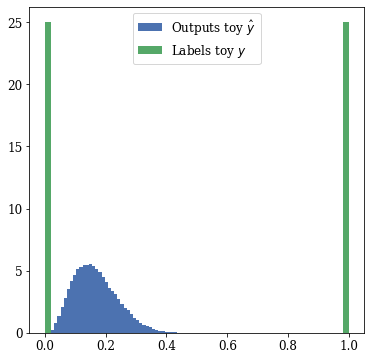

In [119]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(OUTPUTS, bins=50, density=True, label = "Outputs toy $\hat{y}$")
plt.hist(LABELS, bins=50,density=True, label = "Labels toy $y$")
plt.legend()
plt.show()

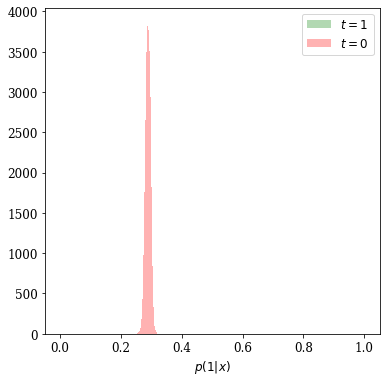

In [126]:
p_toy = compute_prob(model, test_data)

plt.rcParams["figure.figsize"] = (6,6)
plt.hist(p_toy[p_toy>0.5], bins=50, color='g',
            histtype='stepfilled',
            alpha=0.3,label = '$t = 1$')
plt.hist(p_toy[p_toy<0.5], bins=50, color='r',
            histtype='stepfilled',
            alpha=0.3,label = '$t = 0$')
plt.xlabel('$p(1|x)$', fontsize=FONTSIZE)
plt.legend()

In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
auc = roc_auc_score(LABELS, OUTPUTS)

print(' ROC AUC=%.3f' % (auc))

 ROC AUC=0.496


In [128]:
p_toy.shape, p_toy

((50000,),
 array([0.28704184, 0.28629658, 0.29361817, ..., 0.27736655, 0.30299875,
        0.29399204], dtype=float32))

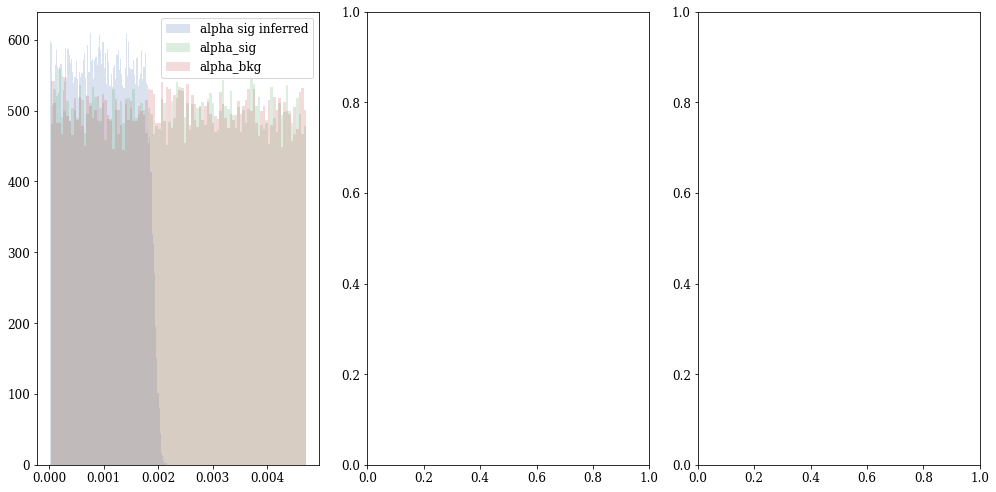

In [153]:
ratio = p_toy/(1-p_toy)

#ratio = OUTPUTS/(1-OUTPUTS)

sig = io[io[:, -1] > 0.5]
bkg = io[io[:, -1] < 0.5]

#alpha is 0th column, beta is 1st column, infected is 2:-1-th columns
alpha_sig = sig[:p_toy.shape[0],0]

alpha_bkg = bkg[:p_toy.shape[0],0]

alpha_sig_inferred = alpha_bkg * ratio

import matplotlib.pyplot as plt #without inline
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,8)) 
ax1, ax2, ax3 = axes.flatten()

ax1.hist(alpha_sig_inferred, bins=100, alpha=0.2, label = 'alpha sig inferred')
ax1.hist(alpha_sig, bins=100, alpha=0.2, label='alpha_sig')

ax1.hist(alpha_bkg, bins=100, alpha=0.2, label='alpha_bkg')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()


ax1.hist(alpha_sig_inferred, bins=100, alpha=0.2, label = 'alpha sig inferred')
ax1.hist(alpha_sig, bins=100, alpha=0.2, label='alpha_sig')

ax1.hist(alpha_bkg, bins=100, alpha=0.2, label='alpha_bkg')
ax1.set_xlabel(r'$\alpha$')
ax1.legend()
plt.tight_layout()

In [169]:
sig[:,0]

(50000,)

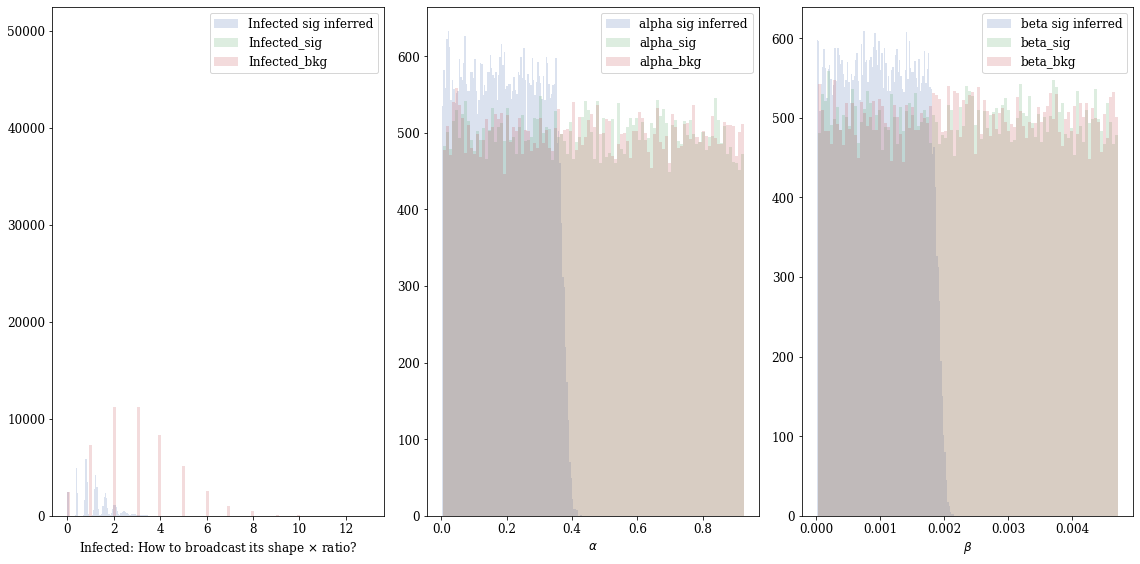

In [173]:
import matplotlib.pyplot as plt #without inline

ratio = p_toy/(1-p_toy)

#alpha is 0th column, beta is 1st column, infected is 2:-1-th columns

Infected_sig = sig[:p_toy.shape[0],2]
Infected_bkg = bkg[:p_toy.shape[0],2]
Infected_sig_inferred = Infected_bkg * ratio

alpha_sig = sig[:p_toy.shape[0],0]
alpha_bkg = bkg[:p_toy.shape[0],0]
alpha_sig_inferred = alpha_bkg * ratio

beta_sig = sig[:p_toy.shape[0],1]
beta_bkg = bkg[:p_toy.shape[0],1]
beta_sig_inferred = beta_bkg * ratio

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,8)) 
ax1, ax2, ax3 = axes.flatten()


# labels_dict = {'Infected':0, 'alpha':1, 'beta':2}
# for key, value in labels_dict.items():
    
#     axes[0,value].hist()
ax1.hist(Infected_sig_inferred.flatten(), bins=100, alpha=0.2, label = 'Infected sig inferred')
ax1.hist(Infected_sig.flatten(), bins=100, alpha=0.2, label='Infected_sig')

ax1.hist(Infected_bkg.flatten(), bins=100, alpha=0.2, label='Infected_bkg')
ax1.set_xlabel(r'Infected: How to broadcast its shape $\times$ ratio?')
ax1.legend()

ax2.hist(alpha_sig_inferred, bins=100, alpha=0.2, label = 'alpha sig inferred')
ax2.hist(alpha_sig, bins=100, alpha=0.2, label='alpha_sig')
ax2.hist(alpha_bkg, bins=100, alpha=0.2, label='alpha_bkg')

ax2.set_xlabel(r'$\alpha$')
ax2.legend()

ax3.hist(beta_sig_inferred, bins=100, alpha=0.2, label = 'beta sig inferred')
ax3.hist(beta_sig, bins=100, alpha=0.2, label='beta_sig')
ax3.hist(beta_bkg, bins=100, alpha=0.2, label='beta_bkg')

ax3.set_xlabel(r'$\beta$')
ax3.legend()


plt.tight_layout()
plt.show()

### But the only thing we can truly compare to is the recoreded infected counts from the England School data!

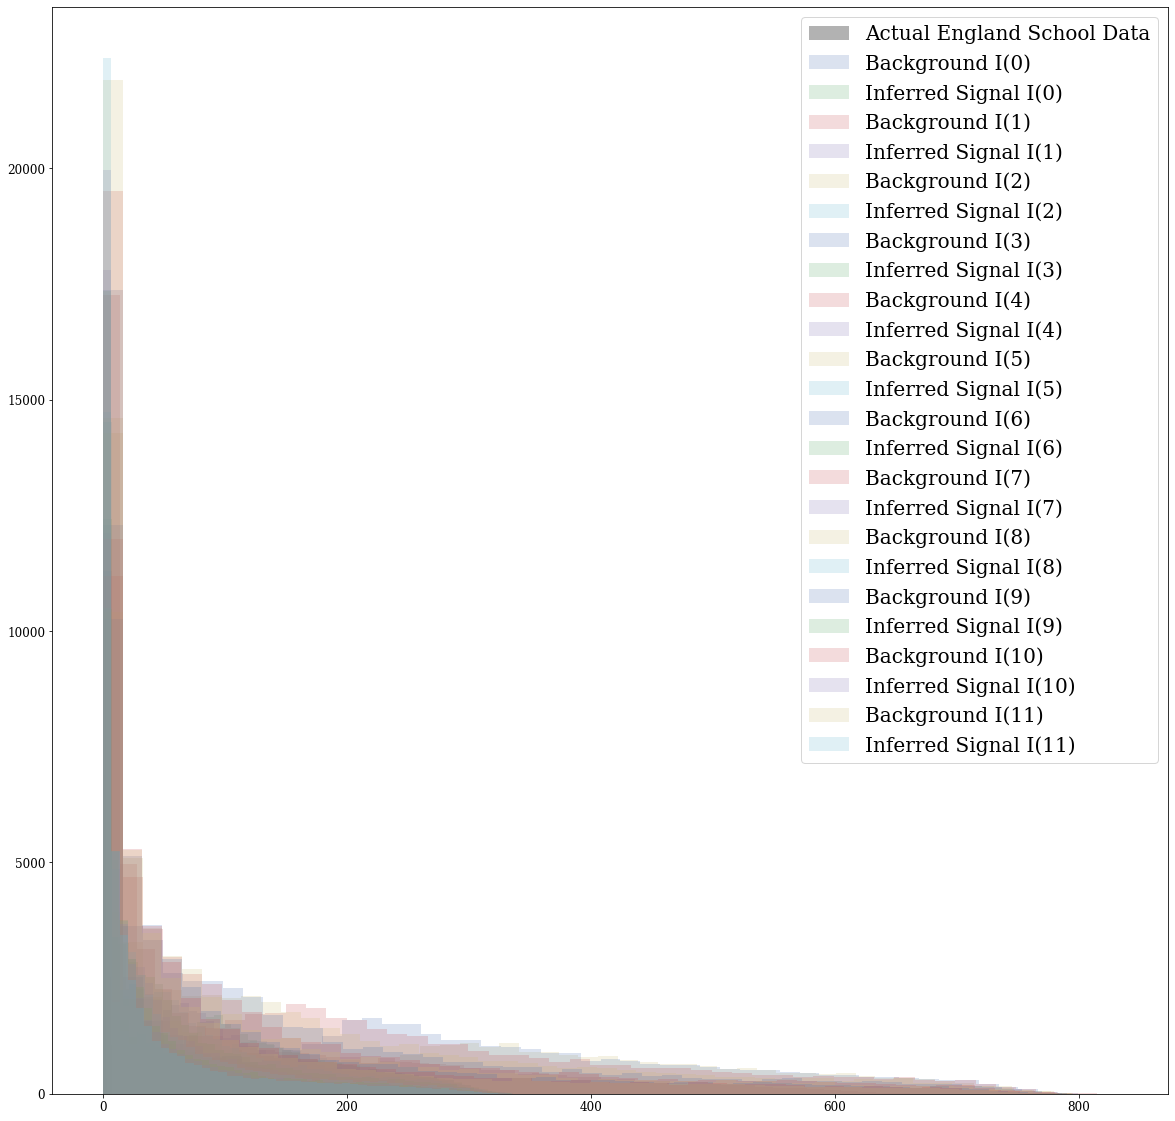

In [185]:
ydata0 = np.array([3, 25, 75, 227, 296, 258, 236, 192, 126, 71, 28, 11, 7])
plt.figure(figsize=(20, 20))

plt.hist(ydata0, bins=50, alpha=0.3, label='Actual England School Data', color='black')

for i in range(0,12):
    #plt.hist(sig[:p_toy.shape[0],2+i], label='Signal I('+str(i)+')', bins=50, alpha=0.2)
    plt.hist(bkg[:p_toy.shape[0],2+i], label='Background I('+str(i)+')', bins=50, alpha=0.2)
    plt.hist(bkg[:p_toy.shape[0],2+i] * ratio, label='Inferred Signal I('+str(i)+')', bins=50, alpha=0.2)
plt.legend(loc='best', fontsize=20)
# Infected_sig = sig[:p_toy.shape[0],2:-1].flatten()
# Infected_bkg = bkg[:p_toy.shape[0],2:-1].flatten()
# Infected_sig_inferred = Infected_bkg * ratio


In [186]:
ydata0.shape

(13,)

## Alternative way of generating signal toy data
The second way we could do this is if we have the mean vector for the signal be the actual (England school data) infected counts themselves, and the covariance matrix be  completely invented.


In [187]:
mean_vec_sig2 = ydata0

cov_mat_sig2 = cov_mat_sig

In [188]:
sig_mvn2 = get_mvn_samples(mu=mean_vec_sig2, cov=cov_mat_sig2, n=50000, d=13); sig_mvn2

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


array([[   1.42936981,  -93.42754403, -106.4968283 , ...,  185.02588504,
         170.40545955,  168.01792821],
       [   3.51067899,  210.91247069,  345.08579114, ...,   50.63059358,
          15.75086559,   -3.84911244],
       [   3.28626581, -142.76793777,   27.79327842, ...,  323.32911671,
         304.6845648 ,  286.69348524],
       ...,
       [   4.32323547,  130.6112395 ,  199.97428387, ..., -212.98050989,
        -230.67763473, -236.50958811],
       [   4.32836484,  162.83262192,  188.87444856, ...,  127.36285631,
         104.32458919,   91.92701992],
       [   3.70438216,  -35.98903735,  -49.56481015, ...,  201.64166941,
         175.3940652 ,  166.12387382]])

In [189]:
bkg_mvn2 = get_mvn_samples(mu=mean_vec_bkg, cov=cov_mat_bkg, n=50000, d=13); bkg_mvn2

array([[-1.47114739e-01,  1.55141273e+02,  2.41957990e+02, ...,
         1.54021575e+02,  1.06750901e+02, -8.71616142e+01],
       [ 4.02625689e+00, -1.89423041e+02,  2.67806526e+02, ...,
         4.65313722e+01,  1.52341768e+02,  1.33070317e+01],
       [ 2.67356180e+00, -1.26757182e+02, -3.36902172e+01, ...,
         1.97441075e+02, -8.79017245e+00,  1.14602566e+02],
       ...,
       [ 8.97785497e-01,  2.13144001e+02,  1.38825620e+02, ...,
        -1.43491359e+02,  4.19632908e+02,  2.77557264e+01],
       [ 2.77183471e+00,  5.01825824e+01, -3.43296568e+01, ...,
         9.48622583e+01,  3.50200305e+02,  1.09685116e+02],
       [ 3.12309901e+00, -6.37332371e+01,  2.27115551e+02, ...,
         3.93391882e+02,  6.97970772e+01,  1.95368878e+02]])

In [190]:
print(sig_mvn2.shape, bkg_mvn2.shape)

(50000, 13) (50000, 13)


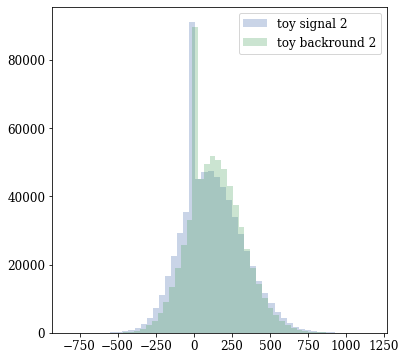

In [191]:
plt.hist(sig_mvn2.ravel(), bins=50, alpha=0.3, label='toy signal 2')
plt.hist(bkg_mvn2.ravel(), bins=50, alpha=0.3, label='toy backround 2')
plt.legend()
plt.show()

In [192]:
sig_mvn2 = np.hstack((sig_mvn2,np.ones((sig_mvn2.shape[0],1))))


bkg_mvn2 = np.hstack((bkg_mvn2,np.zeros((bkg_mvn2.shape[0],1))))


In [193]:
X_toy2 = np.vstack((sig_mvn2, bkg_mvn2))
X_toy2

array([[   1.42936981,  -93.42754403, -106.4968283 , ...,  170.40545955,
         168.01792821,    1.        ],
       [   3.51067899,  210.91247069,  345.08579114, ...,   15.75086559,
          -3.84911244,    1.        ],
       [   3.28626581, -142.76793777,   27.79327842, ...,  304.6845648 ,
         286.69348524,    1.        ],
       ...,
       [   0.8977855 ,  213.14400128,  138.82561993, ...,  419.63290755,
          27.75572644,    0.        ],
       [   2.77183471,   50.18258243,  -34.32965679, ...,  350.2003054 ,
         109.6851159 ,    0.        ],
       [   3.12309901,  -63.73323714,  227.11555123, ...,   69.79707724,
         195.36887762,    0.        ]])

In [194]:
y_toy = X_toy2[:,-1]

y_toy

array([1., 1., 1., ..., 0., 0., 0.])

In [195]:
X_toy2[:,-1] #check the last column

array([1., 1., 1., ..., 0., 0., 0.])

In [196]:
X_toy2 = X_toy2[:, :-1]

X_toy2[:,-1]

array([168.01792821,  -3.84911244, 286.69348524, ...,  27.75572644,
       109.6851159 , 195.36887762])

In [197]:
n_samples, n_features = X_toy2.shape
n_samples, n_features

(100000, 13)

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ntargets = 1
train_data, test_data, train_targets, test_targets = train_test_split(X_toy2, 
                                                                      y_toy, 
                                                                      stratify=y_toy)
#Reshape the targets to have shape (something, 1)
train_targets = train_targets.reshape(-1,1)
test_targets = test_targets.reshape(-1,1)
test_targets

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [199]:
train_dataset = CustomDataset(train_data, train_targets)
test_dataset = CustomDataset(test_data, test_targets)



train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=10, 
                                           num_workers=2, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=10, num_workers=2)

# nfeatures = xtrain.shape[1],
# ntargets = ytrain.shape[1],
# nlayers = 2
# hidden_size=128,
# dropout=0.3
xtrain = train_data;  xtest = test_data
ytrain = train_targets;  ytest = test_targets
ytrain.shape

(75000, 1)

In [200]:
model =  Model(nfeatures=xtrain.shape[1], ntargets=1,
               nlayers=15, hidden_size=128, dropout=0.3)
#print(model)


optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

eng = Engine(model=model, optimizer = optimizer)
best_loss = np.inf
early_stopping_iter = 10
early_stopping_counter = 0
EPOCHS=22


for epoch in range(EPOCHS):
    train_loss = eng.train(train_loader)
    test_loss = eng.train(test_loader)
    print("Epoch : %-10g, Training Loss: %-10g, Test Loss: %-10g" % (epoch, train_loss, test_loss))
    #print(f"{epoch}, {train_loss}, {test_loss}")
    if test_loss < best_loss:
        best_loss = test_loss
        
    else:
        early_stopping_counter += 1
    
    if early_stopping_counter > early_stopping_iter:
        #if we are not improving for 10 iterations then break the loop
        #we could save best model here
        break


Epoch : 0         , Training Loss: 0.000106568, Test Loss: 0.00025358
Epoch : 1         , Training Loss: 0.000102916, Test Loss: 0.000248742
Epoch : 2         , Training Loss: 9.59874e-05, Test Loss: 0.000250508
Epoch : 3         , Training Loss: 0.000107747, Test Loss: 0.000251063
Epoch : 4         , Training Loss: 0.00010211, Test Loss: 0.00024622
Epoch : 5         , Training Loss: 0.000103691, Test Loss: 0.000246798
Epoch : 6         , Training Loss: 9.60847e-05, Test Loss: 0.000247877
Epoch : 7         , Training Loss: 8.56115e-05, Test Loss: 0.000255496
Epoch : 8         , Training Loss: 7.72844e-05, Test Loss: 0.00025672
Epoch : 9         , Training Loss: 0.000100838, Test Loss: 0.000256138
Epoch : 10        , Training Loss: 9.6794e-05, Test Loss: 0.000254221
Epoch : 11        , Training Loss: 9.43767e-05, Test Loss: 0.000249691
Epoch : 12        , Training Loss: 8.91996e-05, Test Loss: 0.000244001
Epoch : 13        , Training Loss: 0.000110123, Test Loss: 0.0002503 
Epoch : 14  

In [201]:
outputs = []
labels = []
accuracies = []

#evaluate
with torch.no_grad():
    for data in test_loader:
        data_cp = copy.deepcopy(data)
        
        xtest = data_cp["x"]
        ytest = data_cp["y"]
        output = model(xtest)
        labels.append(ytest)
        outputs.append(output)
        
        y_predicted_cls = output.round()
        acc = y_predicted_cls.eq(ytest).sum() / float(ytest.shape[0])#bumber of correct predictions/sizeofytest
        #accuracies.append(acc.numpy())
        #print(f'accuracy: {acc.item():.4f}')
        
        del data_cp

#     acc = y_predicted_cls.eq(ytest).sum() / float(ytest.shape[0])
#     print(f'accuracy: {acc.item():.4f}')

In [202]:
OUTPUTS = torch.cat(outputs).view(-1).numpy()#concatenate everything

LABELS = torch.cat(labels).view(-1).numpy()
OUTPUTS, LABELS

(array([0.49199027, 0.23840071, 0.40952522, ..., 0.38200673, 0.44074315,
        0.48012832], dtype=float32),
 array([1., 0., 1., ..., 0., 1., 1.], dtype=float32))

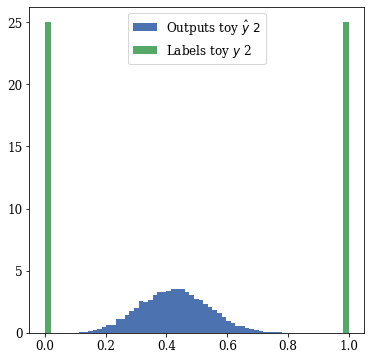

In [203]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(OUTPUTS, bins=50, density=True, label = "Outputs toy $\hat{y} \ 2$")
plt.hist(LABELS, bins=50,density=True, label = "Labels toy $y$ 2")
plt.legend()
plt.show()

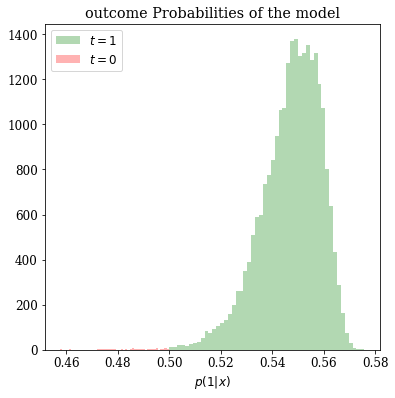

In [207]:
p_toy = compute_prob(model, test_data)

plt.rcParams["figure.figsize"] = (6,6)
plt.hist(p_toy[p_toy>0.5], bins=50, color='g',
            histtype='stepfilled',
            alpha=0.3,label = '$t = 1$')
plt.hist(p_toy[p_toy<0.5], bins=50, color='r',
            histtype='stepfilled',
            alpha=0.3,label = '$t = 0$')
plt.xlabel('$p(1|x)$', fontsize=FONTSIZE)
plt.title('outcome Probabilities of the model')
plt.legend()

In [208]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
auc = roc_auc_score(LABELS, OUTPUTS)

print(' ROC AUC=%.3f' % (auc))

 ROC AUC=0.504


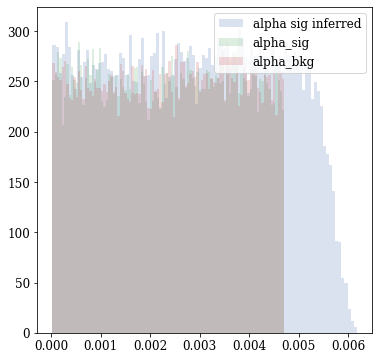

In [209]:
ratio = p_toy/(1-p_toy)

#ratio = OUTPUTS/(1-OUTPUTS)

sig = io[io[:, -1] > 0.5]
bkg = io[io[:, -1] < 0.5]

alpha_sig = sig[:p_toy.shape[0],1]

alpha_bkg = bkg[:p_toy.shape[0],1]

alpha_sig_inferred = aplha_bkg * ratio
plt.hist(alpha_sig_inferred, bins=100, alpha=0.2, label = 'alpha sig inferred')
plt.hist(alpha_sig, bins=100, alpha=0.2, label='alpha_sig')

plt.hist(alpha_bkg, bins=100, alpha=0.2, label='alpha_bkg')
plt.legend()

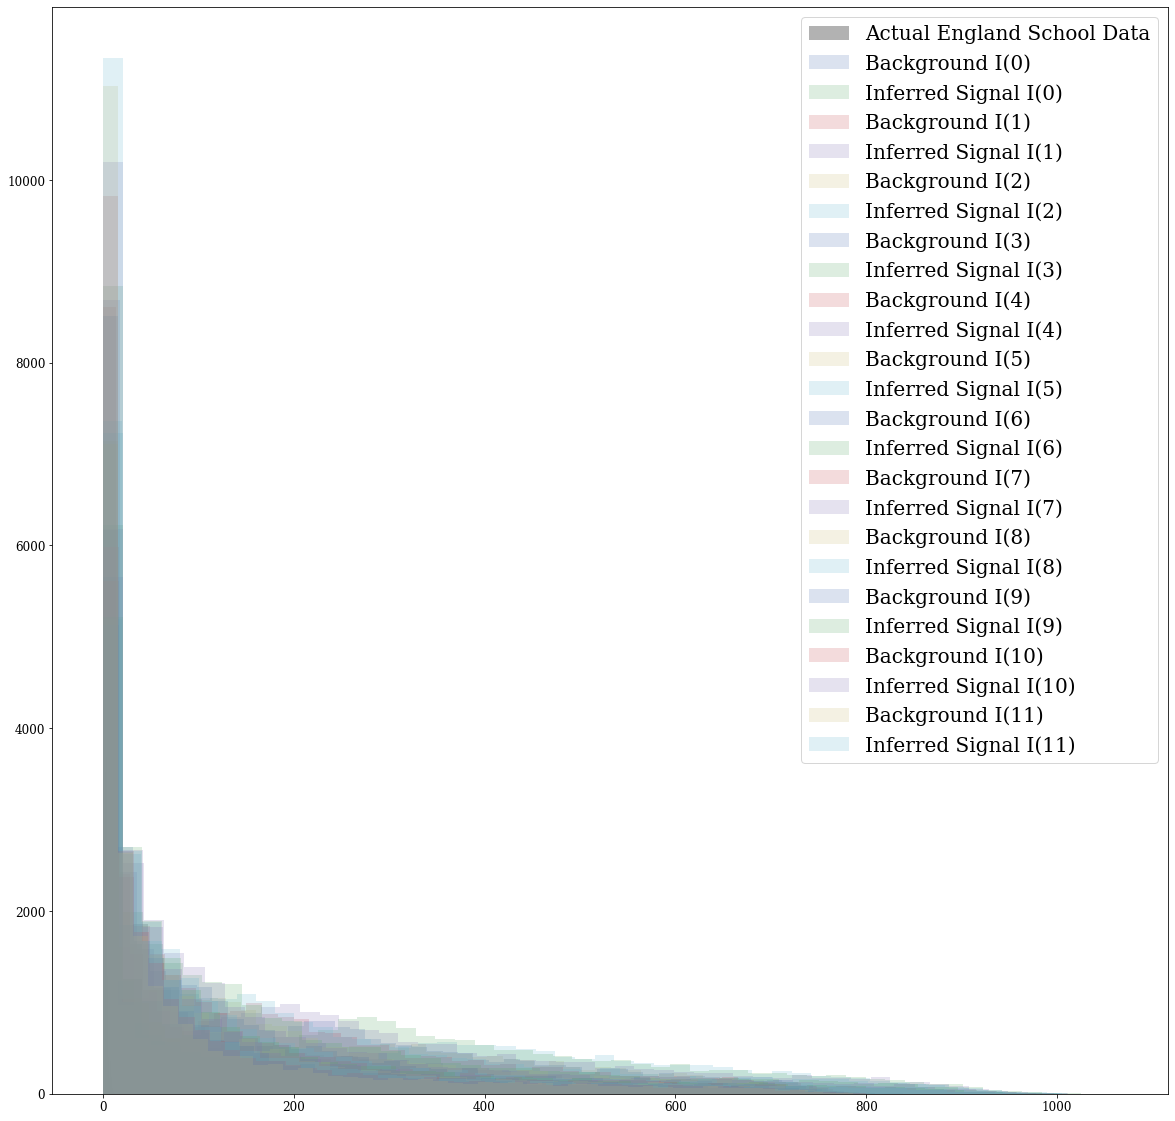

In [210]:
ydata0 = np.array([3, 25, 75, 227, 296, 258, 236, 192, 126, 71, 28, 11, 7])
plt.figure(figsize=(20, 20))

plt.hist(ydata0, bins=50, alpha=0.3, label='Actual England School Data', color='black')

for i in range(0,12):
    #plt.hist(sig[:p_toy.shape[0],2+i], label='Signal I('+str(i)+')', bins=50, alpha=0.2)
    plt.hist(bkg[:p_toy.shape[0],2+i], label='Background I('+str(i)+')', bins=50, alpha=0.2)
    plt.hist(bkg[:p_toy.shape[0],2+i] * ratio, label='Inferred Signal I('+str(i)+')', bins=50, alpha=0.2)
plt.legend(loc='best', fontsize=20)

Let's reduce it to one array of their means

In [229]:
Inferred_I=[]
Inferred_I_means = []
for i in range(0,13):
    Inferred_I.append(bkg[:p_toy.shape[0],2+i] * ratio)
    Inferred_I_means.append((bkg[:p_toy.shape[0],2+i] * ratio).mean())
Inferred_I[0]

array([9.00446093, 2.39123201, 3.8637861 , ..., 6.1680156 , 5.03449535,
       3.44711852])

In [226]:
Inferred_I[0].mean(), Inferred_I[4].mean()

(3.648432017555237, 250.5451071816492)

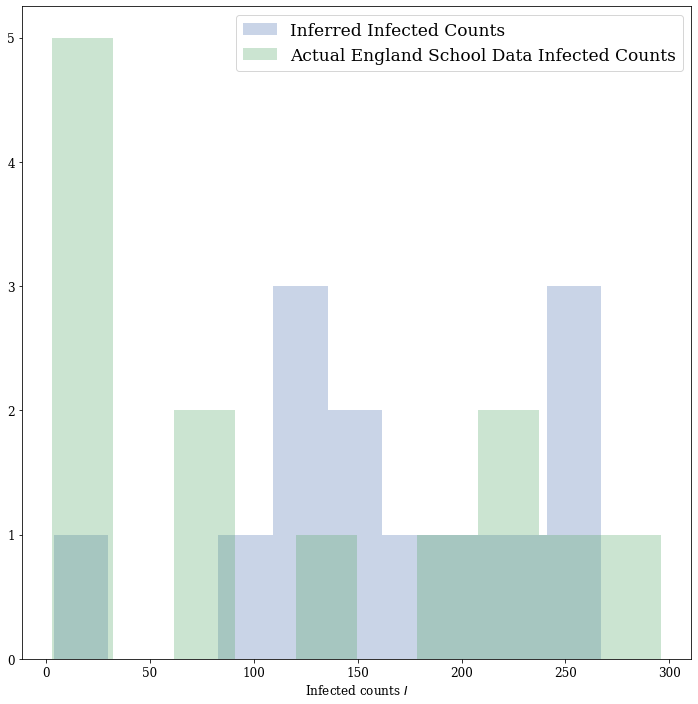

In [235]:
plt.figure(figsize=(12,12))
plt.hist(Inferred_I_means, label='Inferred Infected Counts', alpha=0.3, bins=10)
plt.hist(ydata0, label='Actual England School Data Infected Counts', alpha=0.3, bins=10)
plt.xlabel(r'Infected counts $I$')
plt.legend(fontsize=17)